# Machine Learning Project 2022/2023 - Group 60 <img align='right' width='100' height='125' src='https://maiseducativa.com/wp-content/uploads/2015/02/Logo_Nova-IMS.jpg'>





### Group Members:
Beatriz Carmo - 20220685<br>
João Malho - 20220696<br>
Lizaveta Baryionak - 20220667<br>
Marta Antunes - 20221094<br>
Tomás Côrte-Real - 20221639

***
# 1. Loading Data
<ul>
    <li>Import necessary libraries</li>
    <li>Merge trainning data and testing data in two distinct tables</li>   
</ul>

***

In [1]:
%autosave 90

# Basic libraries: numpy and pandasfor data handling, pyplot
# and seaborn for visualization, math for mathematical operations

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import classification_report
import os
from PIL import Image
import requests
from sklearn.metrics import log_loss

#For Data Split
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, RandomTreesEmbedding
from sklearn.ensemble import GradientBoostingClassifier

#Scaling methods and categorical variable encoder
from sklearn.preprocessing import LabelEncoder

#Model selection
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, KNeighborsTransformer
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


#Model Evaluation
from sklearn.neural_network import MLPClassifier, MLPRegressor
from xgboost.sklearn import XGBClassifier
from sklearn.preprocessing import MinMaxScaler, RobustScaler


#Addicional
import datetime
from datetime import datetime
from datetime import date

Autosaving every 90 seconds


In [2]:
# Training data
train_demo = pd.read_excel('train_demo.xlsx')
train_habits = pd.read_excel('train_habits.xlsx')
train_health = pd.read_excel('train_health.xlsx')

# Testing data
test_demo = pd.read_excel('test_demo.xlsx')
test_habits = pd.read_excel('test_habits.xlsx')
test_health = pd.read_excel('test_health.xlsx')

In [3]:
# Join all the trainning data in 1 dataframe 

#train_demo.set_index('PatientID')
#train_habits.set_index('PatientID')
#train_health.set_index('PatientID')

train_full = pd.merge(pd.merge(train_demo, train_habits, on = 'PatientID'), train_health, on='PatientID')
#train_full.set_index('PatientID', inplace=True)
train_df = train_full.copy()

In [4]:
# Join all the testing data in 1 dataframe

#test_demo.set_index('PatientID')
#test_habits.set_index('PatientID')
#test_health.set_index('PatientID')

test_full = pd.merge(pd.merge(test_demo, test_habits, on='PatientID'), test_health, on='PatientID')
#test_full.set_index('PatientID', inplace=True)
test_df = test_full.copy()

In [5]:
# Checking how the training dataframe is

train_df.head().style

In [6]:
# Checking how the testing dataframe is

train_df.head().style

In [7]:
#checking the shape of each data set
print('There are ', train_df.shape[0], 'rows and ', train_df.shape[1], 'columns on the train set.')
print('There are ', test_df.shape[0], 'rows and ', test_df.shape[1], 'columns on the test set.')

There are  800 rows and  19 columns on the train set.
There are  225 rows and  18 columns on the test set.


In [8]:
#checking for duplicates with all columns in both sets
train_df.duplicated().sum(), test_df.duplicated().sum()

(0, 0)

In [9]:
#checking numeric stats
train_df[train_df.columns].describe().T

count        mean         std     min      25%     50%  \
PatientID         800.0  1513.99875  300.874630  1001.0  1247.50  1519.5   
Birth_Year        800.0  1966.04375   15.421872  1855.0  1961.00  1966.0   
Disease           800.0     0.51375    0.500124     0.0     0.00     1.0   
Height            800.0   167.80625    7.976888   151.0   162.00   167.0   
Weight            800.0    67.82750   12.113470    40.0    58.00    68.0   
High_Cholesterol  800.0   249.32250   51.566631   130.0   213.75   244.0   
Blood_Pressure    800.0   131.05375   17.052693    94.0   120.00   130.0   
Mental_Health     800.0    17.34500    5.385139     0.0    13.00    18.0   
Physical_Health   800.0     4.55875    5.449189     0.0     0.00     3.0   

                      75%     max  
PatientID         1777.25  2024.0  
Birth_Year        1974.00  1993.0  
Disease              1.00     1.0  
Height             173.00   180.0  
Weight              77.00    97.0  
High_Cholesterol   280.00   568.0  
Blood_Pressure     140.00   200.0  
Mental_Health       21.00    29.0  
Physical_Health      7.00    30.0

***
# 2. Data Preprocessing for Train and Test Data
<ul>
    <li>Check Null and cleaning it</li>
    <li>Check the existance of Outliers</li>
    <li>Check the spearman correlation between variables</li>
    <li>Change the categorical variables into numeric variables</li>
</ul>

***   

## __Training Data__ 

***

In [10]:
# check for null values

train_df.isnull().sum()

PatientID            0
Name                 0
Birth_Year           0
Region               0
Education           13
Disease              0
Smoking_Habit        0
Drinking_Habit       0
Exercise             0
Fruit_Habit          0
Water_Habit          0
Height               0
Weight               0
High_Cholesterol     0
Blood_Pressure       0
Mental_Health        0
Physical_Health      0
Checkup              0
Diabetes             0
dtype: int64

In [11]:
# visual null values

train_df[train_df['Education'].isnull()]

PatientID                  Name  Birth_Year         Region Education  \
5         1653     Mr. David Lamothe        1966  East Midlands       NaN   
54        1085    Mr. Robert Swenson        1978     South West       NaN   
86        1048  Mrs. Margaret Wysong        1956  East Midlands       NaN   
124       1128     Mr. John Castillo        1970     South East       NaN   
239       1241     Mr. Tommy Jenkins        1955         London       NaN   
286       1195         Mr. John Hess        1963         London       NaN   
341       1296     Mr. Terry Roberts        1955     South East       NaN   
355       1904   Mr. Manuel Rothwell        1967  East Midlands       NaN   
432       1664     Mrs. Jan Campbell        1956  East Midlands       NaN   
436       1802         Mrs. Mary Rey        1959     South West       NaN   
468       1618        Mr. Dana Morse        1973     South West       NaN   
502       1831         Mr. Levi Auld        1964         London       NaN   
648       1072     Mr. Steven Fisher        1866  East Midlands       NaN   

     Disease Smoking_Habit                       Drinking_Habit Exercise  \
5          0           Yes   I consider myself a social drinker      Yes   
54         1            No  I usually consume alcohol every day       No   
86         1            No   I consider myself a social drinker       No   
124        1            No  I usually consume alcohol every day       No   
239        0            No   I consider myself a social drinker       No   
286        1           Yes  I usually consume alcohol every day       No   
341        0            No  I usually consume alcohol every day       No   
355        1            No  I usually consume alcohol every day       No   
432        1            No  I usually consume alcohol every day       No   
436        0            No  I usually consume alcohol every day      Yes   
468        1            No  I usually consume alcohol every day       No   
502        1            No  I usually consume alcohol every day       No   
648        0           Yes   I consider myself a social drinker      Yes   

                                         Fruit_Habit  \
5    Less than 1. I do not consume fruits every day.   
54   Less than 1. I do not consume fruits every day.   
86                 1 to 2 pieces of fruit in average   
124                    More than six pieces of fruit   
239  Less than 1. I do not consume fruits every day.   
286  Less than 1. I do not consume fruits every day.   
341  Less than 1. I do not consume fruits every day.   
355  Less than 1. I do not consume fruits every day.   
432  Less than 1. I do not consume fruits every day.   
436  Less than 1. I do not consume fruits every day.   
468  Less than 1. I do not consume fruits every day.   
502                    More than six pieces of fruit   
648                1 to 2 pieces of fruit in average   

                                        Water_Habit  Height  Weight  \
5    More than half a liter but less than one liter     167      49   
54                 Between one liter and two liters     165      72   
86   More than half a liter but less than one liter     166      67   
124                          Less than half a liter     167      74   
239                          Less than half a liter     172      55   
286                Between one liter and two liters     174      84   
341                Between one liter and two liters     162      54   
355  More than half a liter but less than one liter     178      82   
432  More than half a liter but less than one liter     167      50   
436                Between one liter and two liters     151      47   
468                          Less than half a liter     172      82   
502                Between one liter and two liters     178      71   
648                Between one liter and two liters     171      62   

     High_Cholesterol  Blood_Pressure  Mental_Health  Physical_Health  \
5       

In [12]:
train_df['Education'].mode()[0]

'University Complete (3 or more years)'

In [13]:
# Fill Nan for Mode of Education, once columns Education is the only one with Nans 
train_df = train_df.fillna(train_df['Education'].mode()[0])
train_df

PatientID                    Name  Birth_Year                    Region  \
0         1167      Mrs. Stephanie Gay        1965                    London   
1         1805        Mr. Sherman Nero        1969                South West   
2         1557         Mr. Mark Boller        1974  Yorkshire and the Humber   
3         1658        Mr. David Caffee        1958                    London   
4         1544        Mr. Gerald Emery        1968                South East   
..         ...                     ...         ...                       ...   
795       1909        Mr. Philip Klink        1972             East Midlands   
796       1386    Mrs. Jackie Valencia        1980                North West   
797       1088      Mrs. Cheryl Harris        1860             East Midlands   
798       1662   Mr. Florencio Doherty        1975           East of England   
799       1117  Mr. Freddie Vermillion        1979                    London   

                                       Education  Disease Smoking_Habit  \
0    High School Incomplete (10th to 11th grade)        1            No   
1    High School Incomplete (10th to 11th grade)        1            No   
2           Elementary School (1st to 9th grade)        1            No   
3          University Complete (3 or more years)        0            No   
4           University Incomplete (1 to 2 years)        1            No   
..                                           ...      ...           ...   
795  High School Incomplete (10th to 11th grade)        0            No   
796         Elementary School (1st to 9th grade)        1            No   
797         Elementary School (1st to 9th grade)        0            No   
798         Elementary School (1st to 9th grade)        1            No   
799         Elementary School (1st to 9th grade)        0            No   

                          Drinking_Habit Exercise  \
0    I usually consume alcohol every day      Yes   
1     I consider myself a social drinker      Yes   
2     I consider myself a social drinker       No   
3    I usually consume alcohol every day      Yes   
4     I consider myself a social drinker       No   
..                                   ...      ...   
795   I consider myself a social drinker      Yes   
796  I usually consume alcohol every day       No   
797   I consider myself a social drinker       No   
798  I usually consume alcohol every day       No   
799   I consider myself a social drinker      Yes   

                                         Fruit_Habit  \
0    Less than 1. I do not consume fruits every day.   
1    Less than 1. I do not consume fruits every day.   
2    Less than 1. I do not consume fruits every day.   
3    Less than 1. I do not consume fruits every day.   
4                  1 to 2 pieces of fruit in average   
..                                               ...   
795  Less than 1. I do not consume fruits every day.   
796  Less than 1. I do not consume fruits every day.   
797                3 to 4 pieces of fruit in average   
798  Less than 1. I do not consume fruits every day.   
799  Less than 1. I do not consume fruits every day.   

                                        Water_Habit  Height  Weight  \
0                  Between one liter and two liters     155      67   
1                  Between one liter and two liters     173      88   
2    More than half a liter but less than one liter     162      68   
3    More than half a liter but less than one liter     180      66   
4    More than half a liter but less than one liter     180      58   
..                                              ...     ...     ...   
795                Between one liter and two liters     178      61   
796                Between one liter and two liters     157      61   
797  More than half a liter but less than one liter     167      48   
798  More than half a liter but less than one liter     165      75   
799                          Less than half a liter 

In [14]:
# Check data without nulls
train_df.isnull().sum()

PatientID           0
Name                0
Birth_Year          0
Region              0
Education           0
Disease             0
Smoking_Habit       0
Drinking_Habit      0
Exercise            0
Fruit_Habit         0
Water_Habit         0
Height              0
Weight              0
High_Cholesterol    0
Blood_Pressure      0
Mental_Health       0
Physical_Health     0
Checkup             0
Diabetes            0
dtype: int64

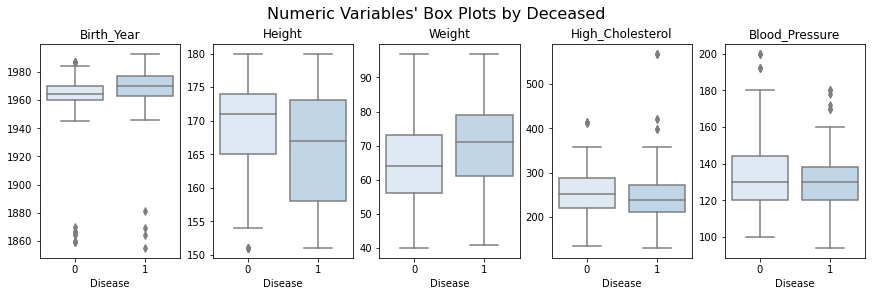

In [15]:
#divide data into numeric and non-numeric features

sns.set_palette(sns.color_palette("Blues"))

metric_feat=['Birth_Year', 'Height', 'Weight', 'High_Cholesterol', 'Blood_Pressure']
categorical_feat= ['Region', 'Education', 'Smoking_Habit', 'Drinking_Habit', 'Exercise', 'Fruit_Habit',
                 'Water_Habit', 'Mental_Health', 'Physical_Health', 'Checkup', 'Diabetes']
#excluding name since it is not an important feature

features=metric_feat+['Disease']

fig, axes = plt.subplots(1, len(metric_feat), figsize=(12, 4), constrained_layout=True)

for ax, f in zip(axes.flatten(), features):
    sns.boxplot(y=f, data=train_df, ax=ax, x='Disease')
    ax.set_title(f)
    ax.set_ylabel('') 
        
plt.suptitle("Numeric Variables' Box Plots by Deceased", fontsize=16)
plt.show()

In [16]:
#check incoherence in Region - repeated regions written in a different way 
print('\033[1mThe unique Regions Values of Training Data are: \033[0m \n', train_df.Region.unique())
print('\n\033[1mThe unique Regions Values of Testing Data are: \033[0m \n', test_df.Region.unique())

#check incoherences in Education
print('\n\n\033[1mThe unique Education Values of Training Data are: \033[0m \n',train_df.Education.unique())
print('\n\033[1mThe unique Education Values of Testing Data are: \033[0m \n',test_df.Education.unique())

#check Smoking_Habit
print('\n\n\033[1mThe unique Smoking Habit of Training Data are: \033[0m \n',train_df.Smoking_Habit.unique())
print('\n\033[1mThe unique Smoking Habit of Testing Data are: \033[0m \n',test_df.Smoking_Habit.unique())

#check Drinking_Habit
print('\n\n\033[1mThe unique Drinking Habit of Training Data are: \033[0m \n',train_df.Drinking_Habit.unique())
print('\n\033[1mThe unique Drinking Habit of Testing Data are: \033[0m \n',test_df.Drinking_Habit.unique())

#check Exercise
print('\n\n\033[1mThe unique Exercise Values of Training Data are: \033[0m \n',train_df.Exercise.unique())
print('\n\033[1mThe unique Exercise Values of Testing Data are: \033[0m \n',test_df.Exercise.unique())

#check Fruit_Habit
print('\n\n\033[1mThe unique Fruit Habit of Training Data are: \033[0m \n',train_df.Fruit_Habit.unique())
print('\n\033[1mThe unique Fruit Habit of Testing Data are: \033[0m \n',test_df.Fruit_Habit.unique())

#check Water_Habit
print('\n\n\033[1mThe unique Water Habit of Training Data are: \033[0m \n',train_df.Water_Habit.unique())
print('\n\033[1mThe unique Water Habit of Testing Data are: \033[0m \n',test_df.Water_Habit.unique())

#check Diabetes
print('\n\n\033[1mThe unique Diabetes Values of Training Data are: \033[0m \n',train_df.Diabetes.unique())
print('\n\033[1mThe unique Diabetes Values of Testing Data are: \033[0m \n',test_df.Diabetes.unique())

The unique Regions Values of Training Data are:  
 ['London' 'South West' 'Yorkshire and the Humber' 'South East'
 'East Midlands' 'West Midlands' 'East of England' 'North West'
 'North East' 'LONDON']

The unique Regions Values of Testing Data are:  
 ['East Midlands' 'Yorkshire and the Humber' 'West Midlands' 'North East'
 'South West' 'London' 'South East' 'East of England' 'North West']


The unique Education Values of Training Data are:  
 ['High School Incomplete (10th to 11th grade)'
 'Elementary School (1st to 9th grade)'
 'University Complete (3 or more years)'
 'University Incomplete (1 to 2 years)' 'High School Graduate'
 'I never attended school / Other']

The unique Education Values of Testing Data are:  
 ['Elementary School (1st to 9th grade)'
 'University Complete (3 or more years)'
 'High School Incomplete (10th to 11th grade)' 'High School Graduate'
 'University Incomplete (1 to 2 years)' 'I never attended school / Other']


The unique Smoking Habit of Training Data a

In [17]:
#checking incoherences between education and year of birth
#assuming one cannot attend University being less than 17 years-old 
(((train_df.Education=='University Complete (3 or more years)')\
 |(train_df.Education=='University Incomplete (1 to 2 years)'))\
 & (train_df.Birth_Year>2005)).sum() ,(((test_df.Education=='University Complete (3 or more years)')\
 |(test_df.Education=='University Incomplete (1 to 2 years)'))\
 & (test_df.Birth_Year>2005)).sum()

(0, 0)

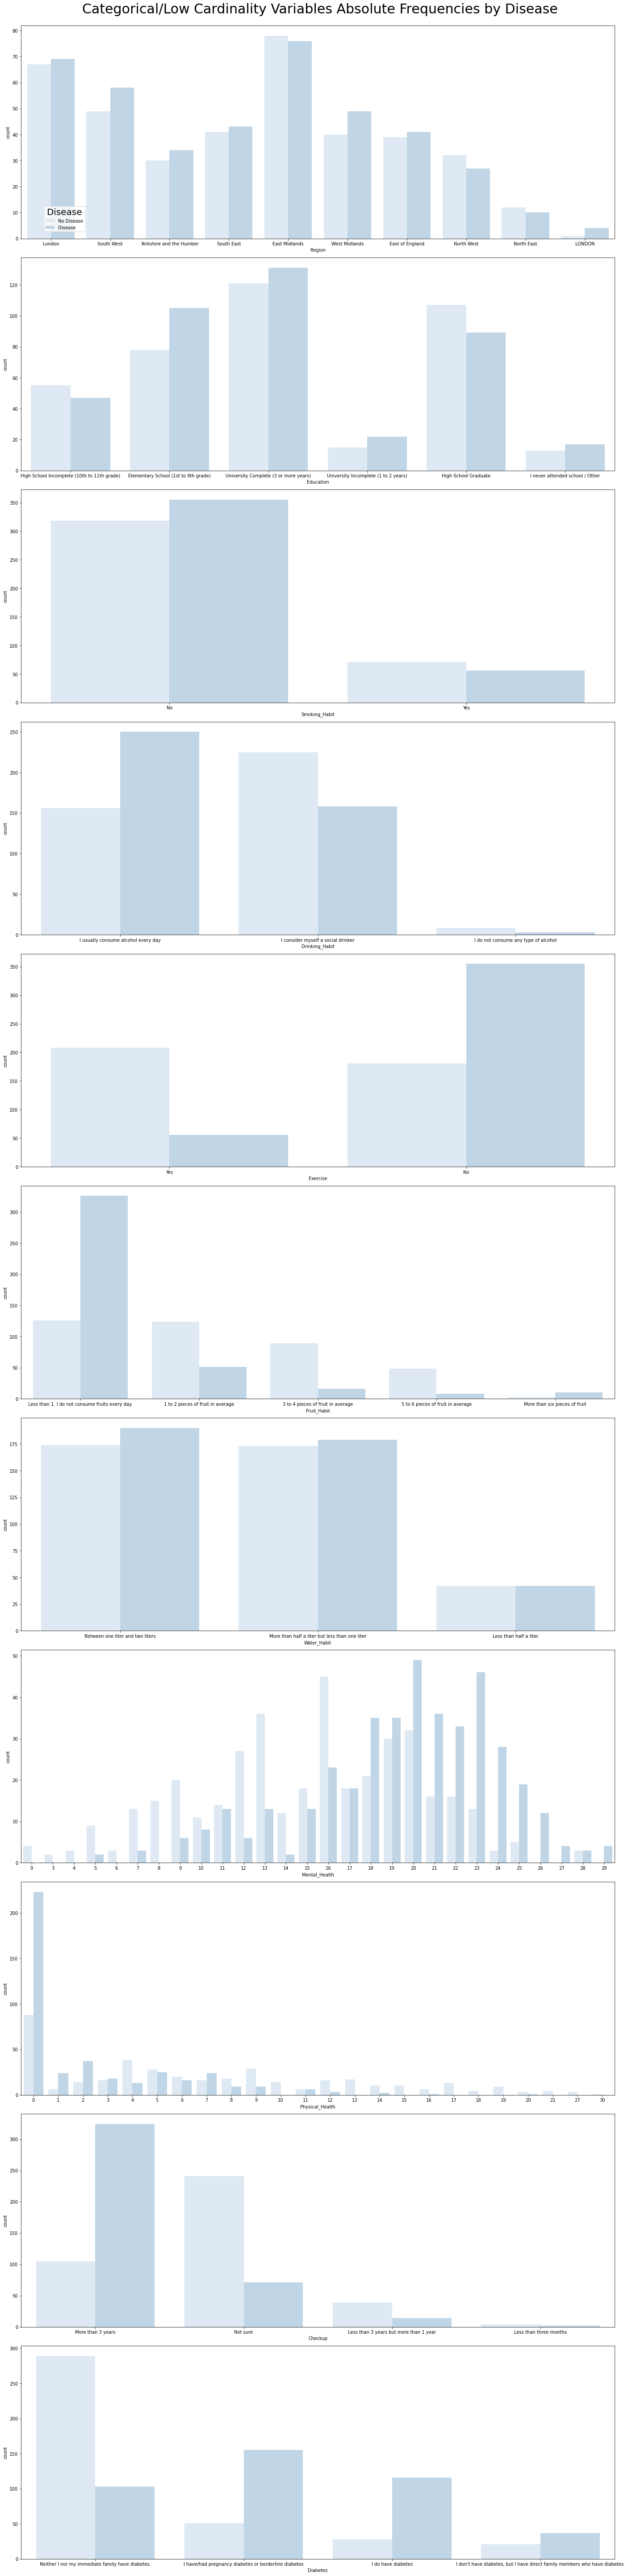

In [18]:
sns.set_palette(sns.color_palette("Blues"))

fig, axes = plt.subplots(11, math.floor(len(categorical_feat)/11), figsize=(20,80))

for ax, x in zip(axes.flatten(), categorical_feat):
    if x == "Disease":
        sns.countplot(x=x, hue="Disease", order=[0, 1], data=df,  ax=x )
    else:
        sns.countplot(x=x, hue="Disease", data=train_df, ax=ax)
    ax.get_legend().remove()

handles, _ = axes[0].get_legend_handles_labels()
fig.legend(handles, ["No Disease", "Disease"], loc=(0.07,0.91), title="Disease", title_fontsize=20)

#plt.subplots_adjust(wspace=0.5)
plt.suptitle("Categorical/Low Cardinality Variables Absolute Frequencies by Disease", y=1, fontsize=30)
plt.tight_layout()

In [19]:
# Investigate all elements within each feacture

for column in train_df:
    unique_values = np.unique(train_df[column])
    nr_values = len(unique_values)
    if nr_values < 10:
        print('The number of values for feature {} is: {} -- {}'.format(column, nr_values, unique_values))
    else:
        print('The number of values for feature {} is: {}'.format(column, nr_values))

The number of values for feature PatientID is: 800
The number of values for feature Name is: 799
The number of values for feature Birth_Year is: 50
The number of values for feature Region is: 10
The number of values for feature Education is: 6 -- ['Elementary School (1st to 9th grade)' 'High School Graduate'
 'High School Incomplete (10th to 11th grade)'
 'I never attended school / Other' 'University Complete (3 or more years)'
 'University Incomplete (1 to 2 years)']
The number of values for feature Disease is: 2 -- [0 1]
The number of values for feature Smoking_Habit is: 2 -- ['No' 'Yes']
The number of values for feature Drinking_Habit is: 3 -- ['I consider myself a social drinker'
 'I do not consume any type of alcohol'
 'I usually consume alcohol every day']
The number of values for feature Exercise is: 2 -- ['No' 'Yes']
The number of values for feature Fruit_Habit is: 5 -- ['1 to 2 pieces of fruit in average' '3 to 4 pieces of fruit in average'
 '5 to 6 pieces of fruit in average'

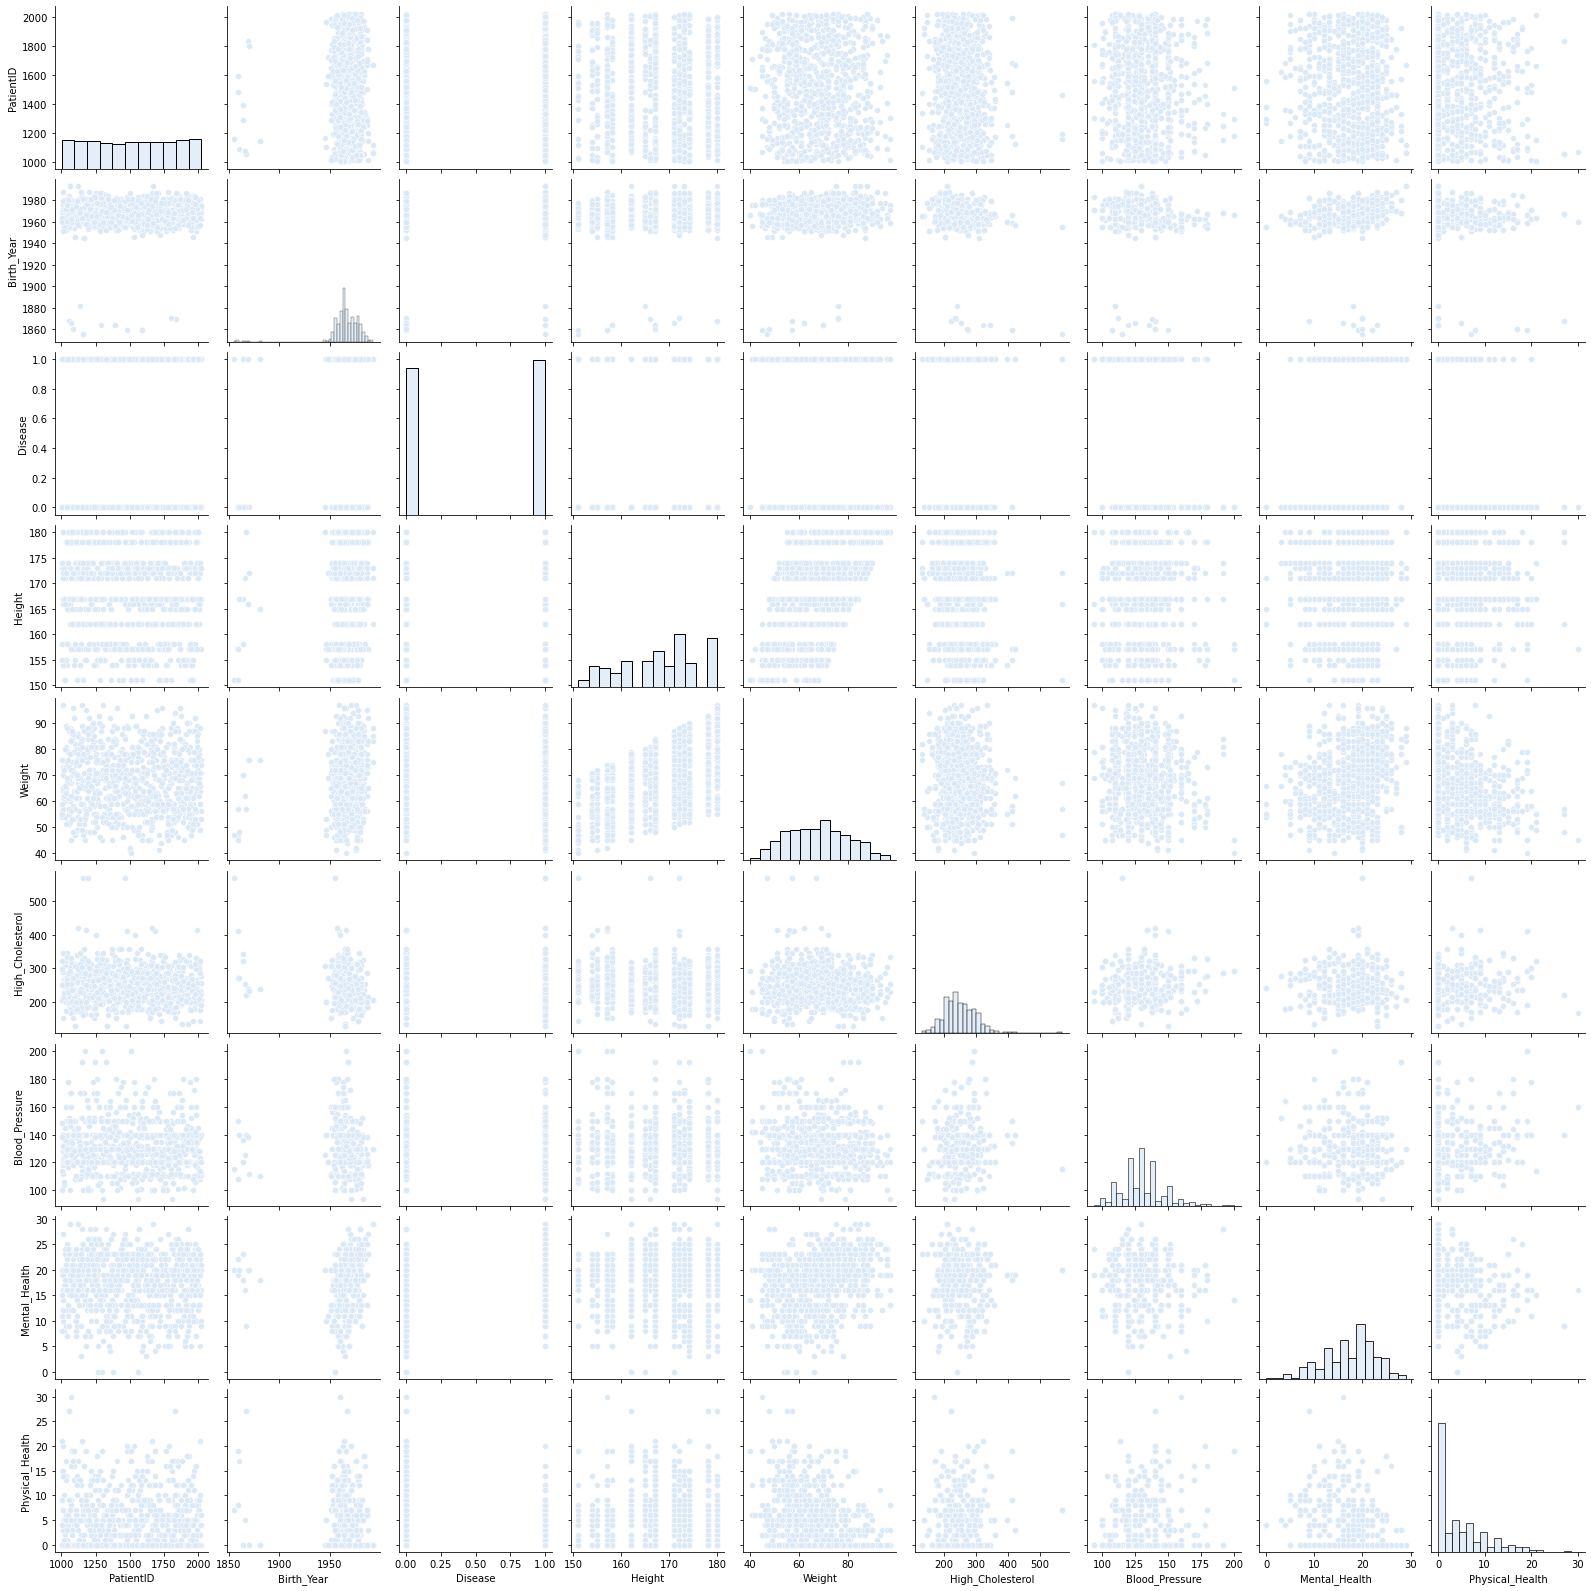

In [20]:
# Visualize the data using pairplots

pairplots = sns.pairplot(train_df)


## __Testing Data__ 

***
<ul>
    <li>Once we dont have Outliers in Testing Data we dont need to work over those</li>
</ul>



In [21]:
# check for null values

test_df.isnull().sum()

PatientID           0
Name                0
Birth_Year          0
Region              0
Education           0
Smoking_Habit       0
Drinking_Habit      0
Exercise            0
Fruit_Habit         0
Water_Habit         0
Height              0
Weight              0
High_Cholesterol    0
Blood_Pressure      0
Mental_Health       0
Physical_Health     0
Checkup             0
Diabetes            0
dtype: int64

In [22]:
# Investigate all elements within each feacture

for column in test_df:
    unique_values = np.unique(test_df[column])
    nr_values = len(unique_values)
    if nr_values < 10:
        print('The number of values for feature {} is: {} -- {}'.format(column, nr_values, unique_values))
    else:
        print('The number of values for feature {} is: {}'.format(column, nr_values))
    
    

The number of values for feature PatientID is: 225
The number of values for feature Name is: 224
The number of values for feature Birth_Year is: 39
The number of values for feature Region is: 9 -- ['East Midlands' 'East of England' 'London' 'North East' 'North West'
 'South East' 'South West' 'West Midlands' 'Yorkshire and the Humber']
The number of values for feature Education is: 6 -- ['Elementary School (1st to 9th grade)' 'High School Graduate'
 'High School Incomplete (10th to 11th grade)'
 'I never attended school / Other' 'University Complete (3 or more years)'
 'University Incomplete (1 to 2 years)']
The number of values for feature Smoking_Habit is: 2 -- ['No' 'Yes']
The number of values for feature Drinking_Habit is: 3 -- ['I consider myself a social drinker'
 'I do not consume any type of alcohol'
 'I usually consume alcohol every day']
The number of values for feature Exercise is: 2 -- ['No' 'Yes']
The number of values for feature Fruit_Habit is: 5 -- ['1 to 2 pieces of fru

There is no Outliers in Test Data


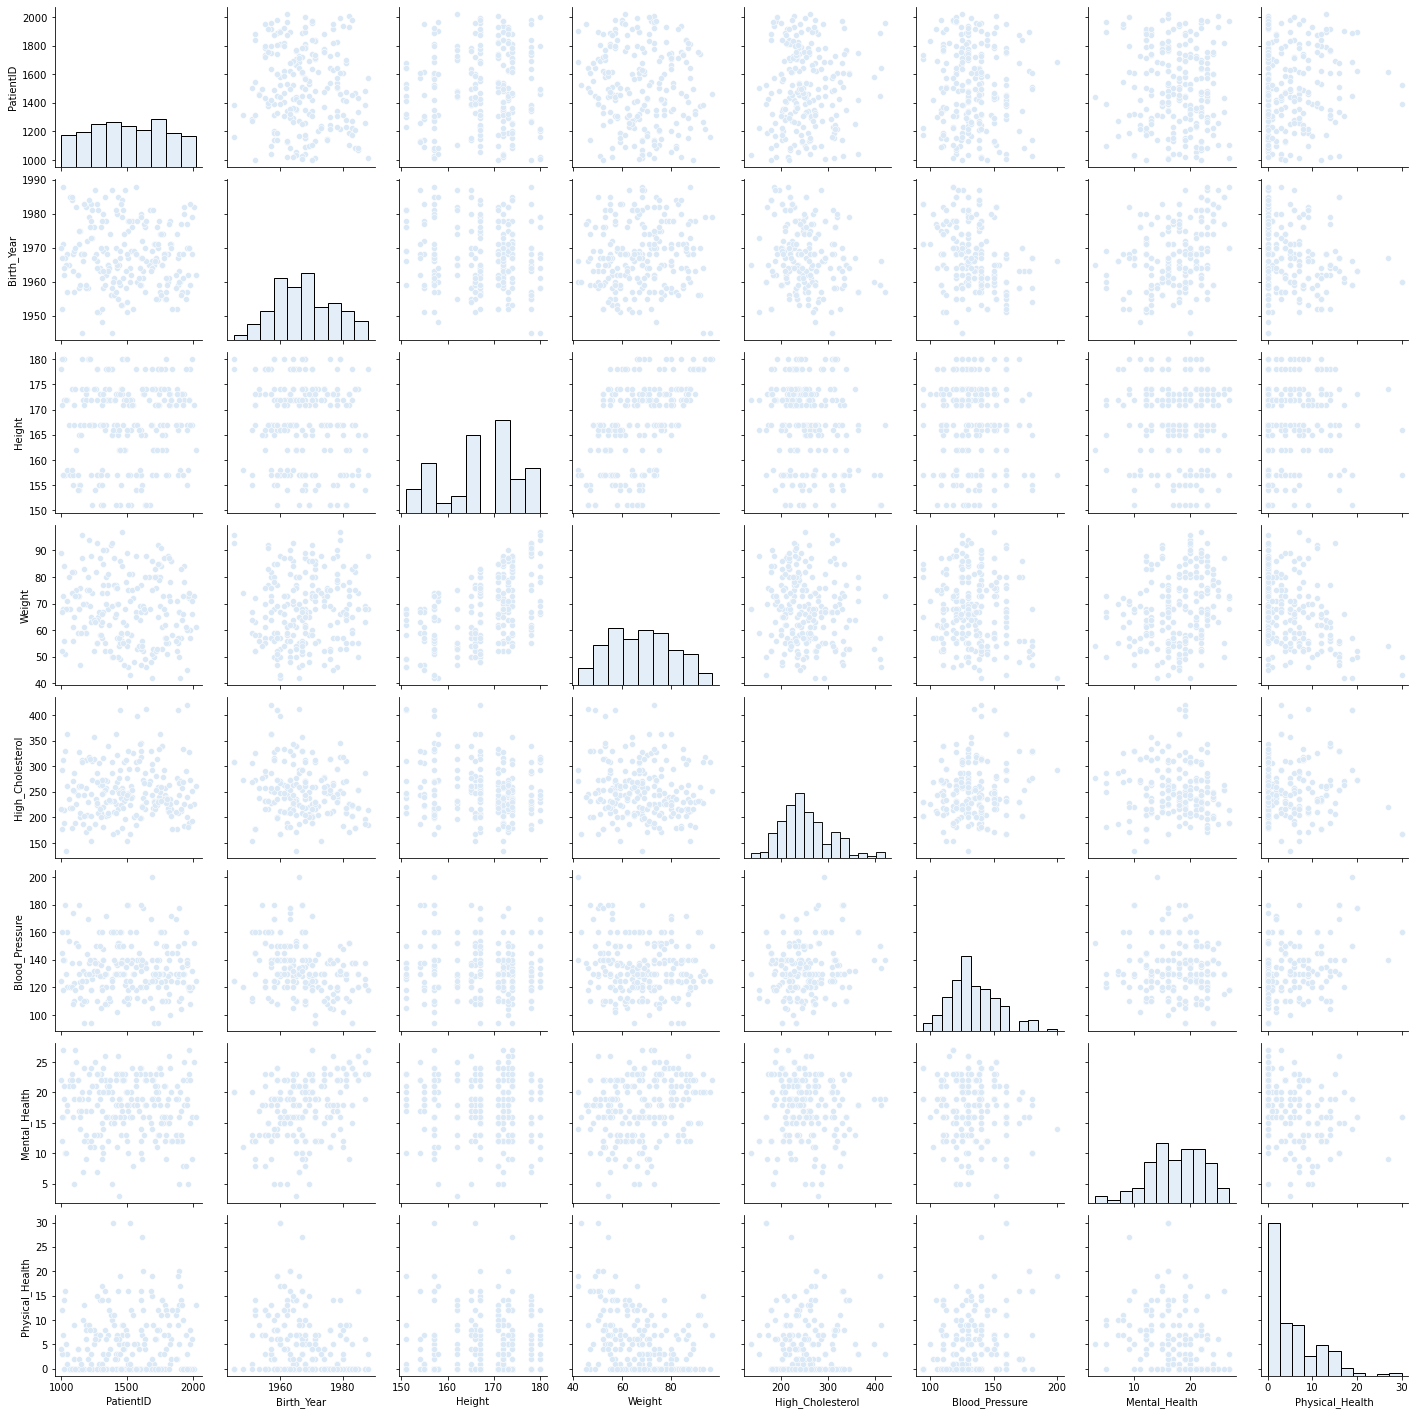

In [23]:
# Visualize the data using pairplots
print('There is no Outliers in Test Data')
pairplots = sns.pairplot(test_df)


***
# 3. Data Cleaning for Train and Test Data
<ul>
    <li>Changing capital words</li>
    <li>Removing outliers</li>
    <li>Change categorical variables into numeric representation</li>
<ul>
    
***

>### A. Training Data

***

In [24]:
# Change the LONDON to London in Training df

train_df['Region'] = train_df['Region'].replace(['LONDON'], 'London')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 799
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   PatientID         800 non-null    int64 
 1   Name              800 non-null    object
 2   Birth_Year        800 non-null    int64 
 3   Region            800 non-null    object
 4   Education         800 non-null    object
 5   Disease           800 non-null    int64 
 6   Smoking_Habit     800 non-null    object
 7   Drinking_Habit    800 non-null    object
 8   Exercise          800 non-null    object
 9   Fruit_Habit       800 non-null    object
 10  Water_Habit       800 non-null    object
 11  Height            800 non-null    int64 
 12  Weight            800 non-null    int64 
 13  High_Cholesterol  800 non-null    int64 
 14  Blood_Pressure    800 non-null    int64 
 15  Mental_Health     800 non-null    int64 
 16  Physical_Health   800 non-null    int64 
 17  Checkup         

In [25]:
print(train_df.columns)


Index(['PatientID', 'Name', 'Birth_Year', 'Region', 'Education', 'Disease',
       'Smoking_Habit', 'Drinking_Habit', 'Exercise', 'Fruit_Habit',
       'Water_Habit', 'Height', 'Weight', 'High_Cholesterol', 'Blood_Pressure',
       'Mental_Health', 'Physical_Health', 'Checkup', 'Diabetes'],
      dtype='object')


In [26]:
# Deleting the outliers

train_df[train_df['Birth_Year'] < 1900]

PatientID                     Name  Birth_Year                    Region  \
18        1591         Mrs. Ashley Pena        1859  Yorkshire and the Humber   
61        1481          Mrs. Lisa Cooks        1859             East Midlands   
93        1288   Mrs. Minnie Hirschfeld        1864  Yorkshire and the Humber   
198       1139            Mr. Gary Baca        1881             East Midlands   
312       1158  Mrs. Mary Hollingsworth        1855                South West   
493       1593        Mrs. Nicole Ronin        1859                North East   
566       1055      Mr. Douglas Salters        1867             East Midlands   
593       1836        Mrs. Sharyn Furst        1869             West Midlands   
640       1803      Mr. Kenneth Ferraro        1870           East of England   
648       1072        Mr. Steven Fisher        1866             East Midlands   
705       1390       Mrs. Susan Bullard        1864             East Midlands   
797       1088       Mrs. Cheryl Harris        1860             East Midlands   

                                       Education  Disease Smoking_Habit  \
18          Elementary School (1st to 9th grade)        0            No   
61                          High School Graduate        0            No   
93   High School Incomplete (10th to 11th grade)        1            No   
198         University Incomplete (1 to 2 years)        1            No   
312         Elementary School (1st to 9th grade)        1            No   
493         Elementary School (1st to 9th grade)        0            No   
566         Elementary School (1st to 9th grade)        0            No   
593                         High School Graduate        1            No   
640                         High School Graduate        0            No   
648        University Complete (3 or more years)        0           Yes   
705         Elementary School (1st to 9th grade)        0           Yes   
797         Elementary School (1st to 9th grade)        0            No   

                          Drinking_Habit Exercise  \
18   I usually consume alcohol every day      Yes   
61    I consider myself a social drinker       No   
93   I usually consume alcohol every day       No   
198  I usually consume alcohol every day       No   
312   I consider myself a social drinker       No   
493  I usually consume alcohol every day      Yes   
566  I usually consume alcohol every day      Yes   
593   I consider myself a social drinker       No   
640  I usually consume alcohol every day       No   
648   I consider myself a social drinker      Yes   
705   I consider myself a social drinker       No   
797   I consider myself a social drinker       No   

                                         Fruit_Habit  \
18                 3 to 4 pieces of fruit in average   
61                 5 to 6 pieces of fruit in average   
93   Less than 1. I do not consume fruits every day.   
198  Less than 1. I do not consume fruits every day.   
312  Less than 1. I do not consume fruits every day.   
493                3 to 4 pieces of fruit in average   
566  Less than 1. I do not consume fruits every day.   
593  Less than 1. I do not consume fruits every day.   
640                1 to 2 pieces of fruit in average   
648                1 to 2 pieces of fruit in average   
705                3 to 4 pieces of fruit in average   
797                3 to 4 pieces of fruit in average   

                                        Water_Habit  Height  Weight  \
18   More than half a liter but less than one liter     157      47   
61   More than half a liter but less than one liter     157      57   
93                 Between one liter and two liters     167      70   
198                Between one liter and two liters     165      76   
312  More than half a liter but less than one liter     151      47   
493  More than half a liter but less than one liter     151      45   
566                          Less than half a liter     180

In [27]:
# Droping elements that have been born after 1900 once we can check that are outliers

train_df = train_df[train_df['Birth_Year'] > 1900]

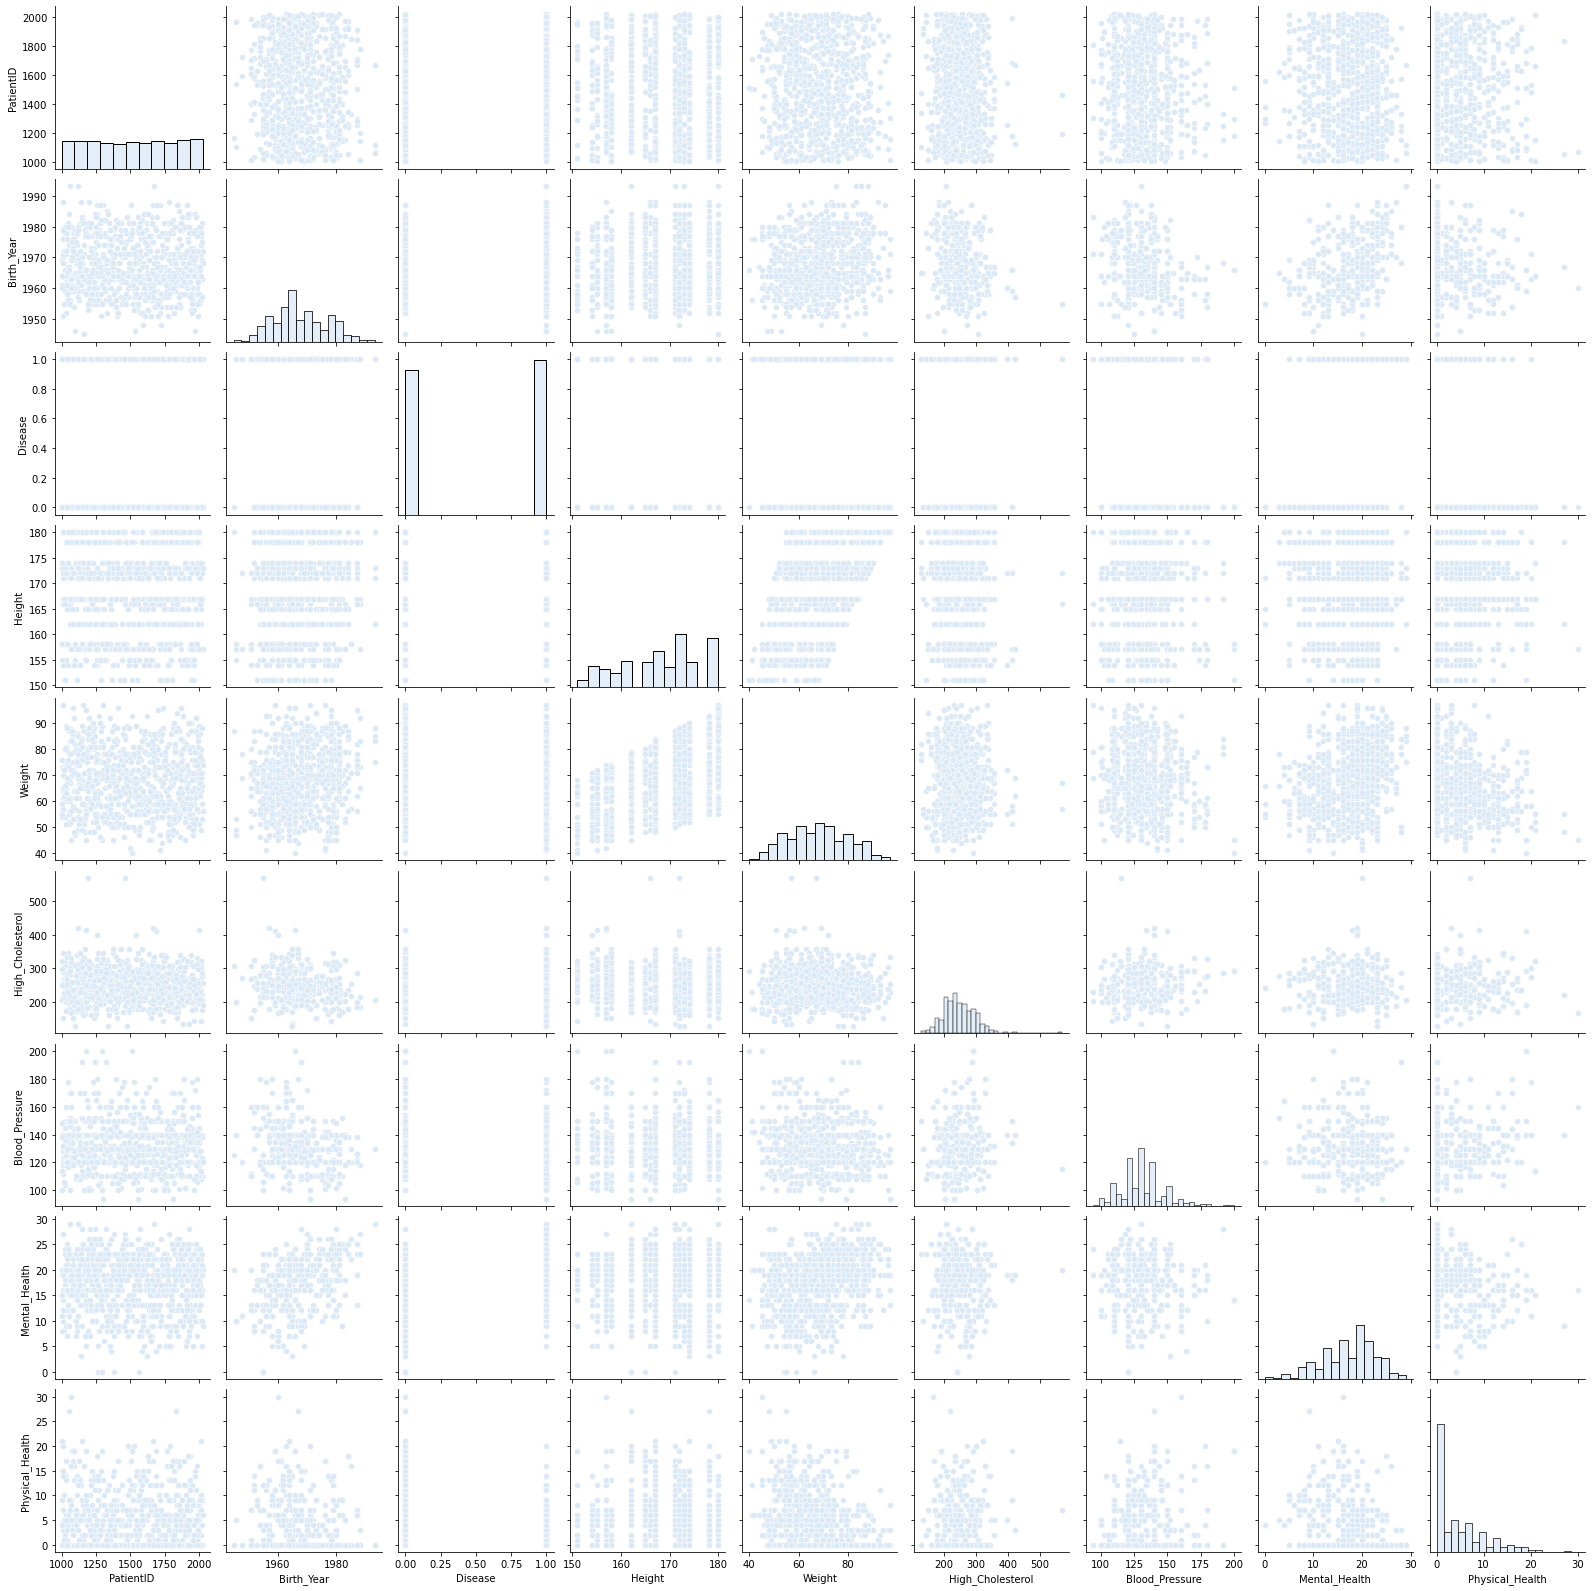

In [28]:
# Visualize the data using pairplots

pairplots = sns.pairplot(train_df)


In [29]:
# We also can regard patients with cholesterol of more then 500 as outliers

train_df[train_df['High_Cholesterol'] > 500]

PatientID                  Name  Birth_Year         Region  \
22        1464    Mrs. Jeanne Rogers        1955  East Midlands   
729       1192  Mrs. Karen Smallidge        1955         London   

                                       Education  Disease Smoking_Habit  \
22   High School Incomplete (10th to 11th grade)        1            No   
729              I never attended school / Other        1            No   

                         Drinking_Habit Exercise  \
22   I consider myself a social drinker       No   
729  I consider myself a social drinker       No   

                                         Fruit_Habit  \
22   Less than 1. I do not consume fruits every day.   
729  Less than 1. I do not consume fruits every day.   

                          Water_Habit  Height  Weight  High_Cholesterol  \
22   Between one liter and two liters     166      57               568   
729  Between one liter and two liters     172      67               568   

     Blood_Pressure  Mental_Health  Physical_Health   Checkup  \
22              115             20                7  Not sure   
729             115             20                7  Not sure   

                                              Diabetes  
22   I have/had pregnancy diabetes or borderline di...  
729  I have/had pregnancy diabetes or borderline di...

In [30]:
# Drop 500+ cholesterol patients
train_df = train_df[train_df['High_Cholesterol'] < 500]

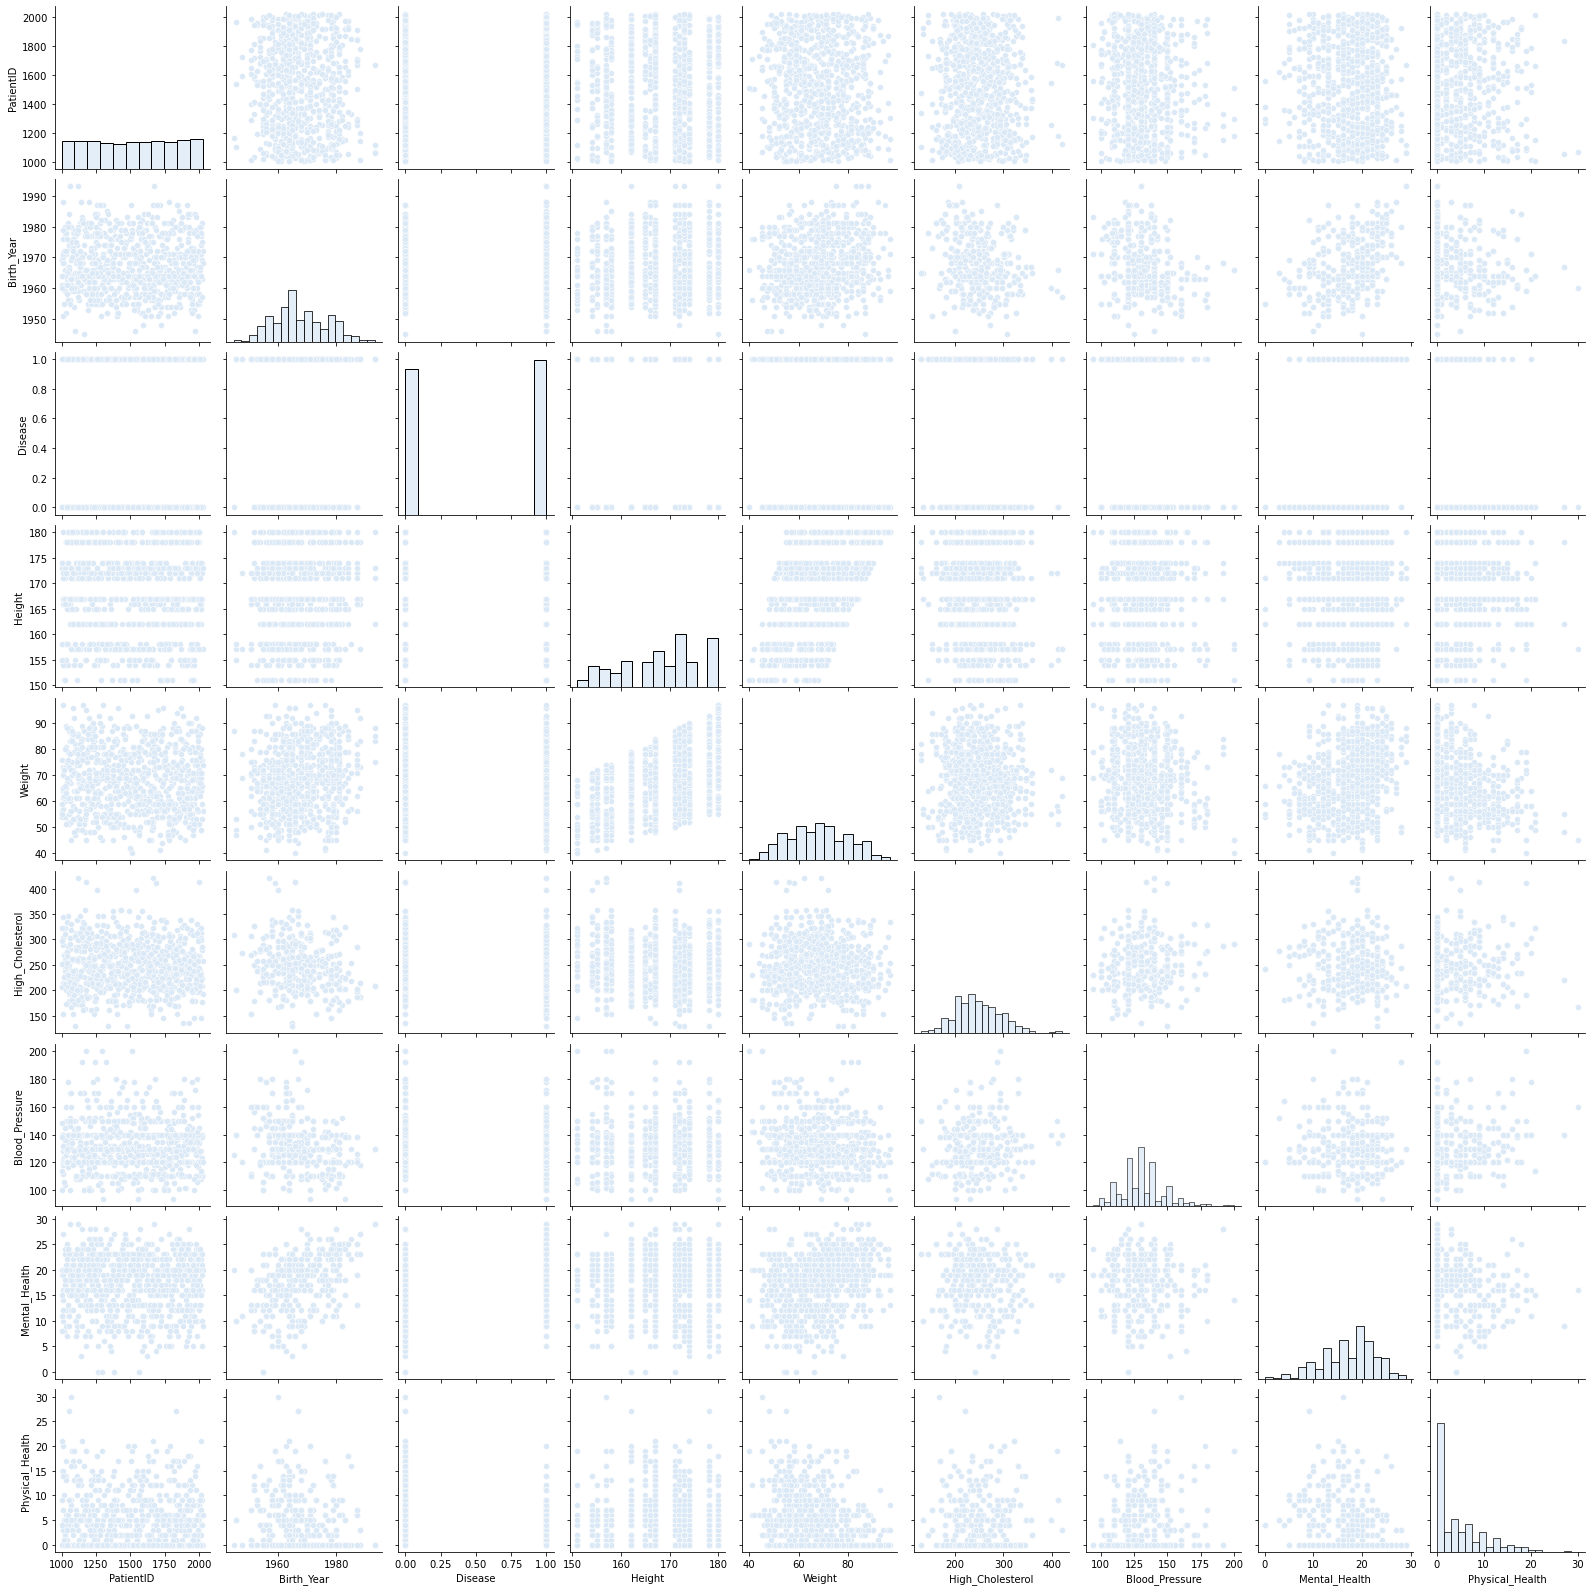

In [31]:
pairplots = sns.pairplot(train_df)

In [32]:
# Drop 180+ Blood Pressure patients
train_df = train_df[train_df['Blood_Pressure'] < 180]

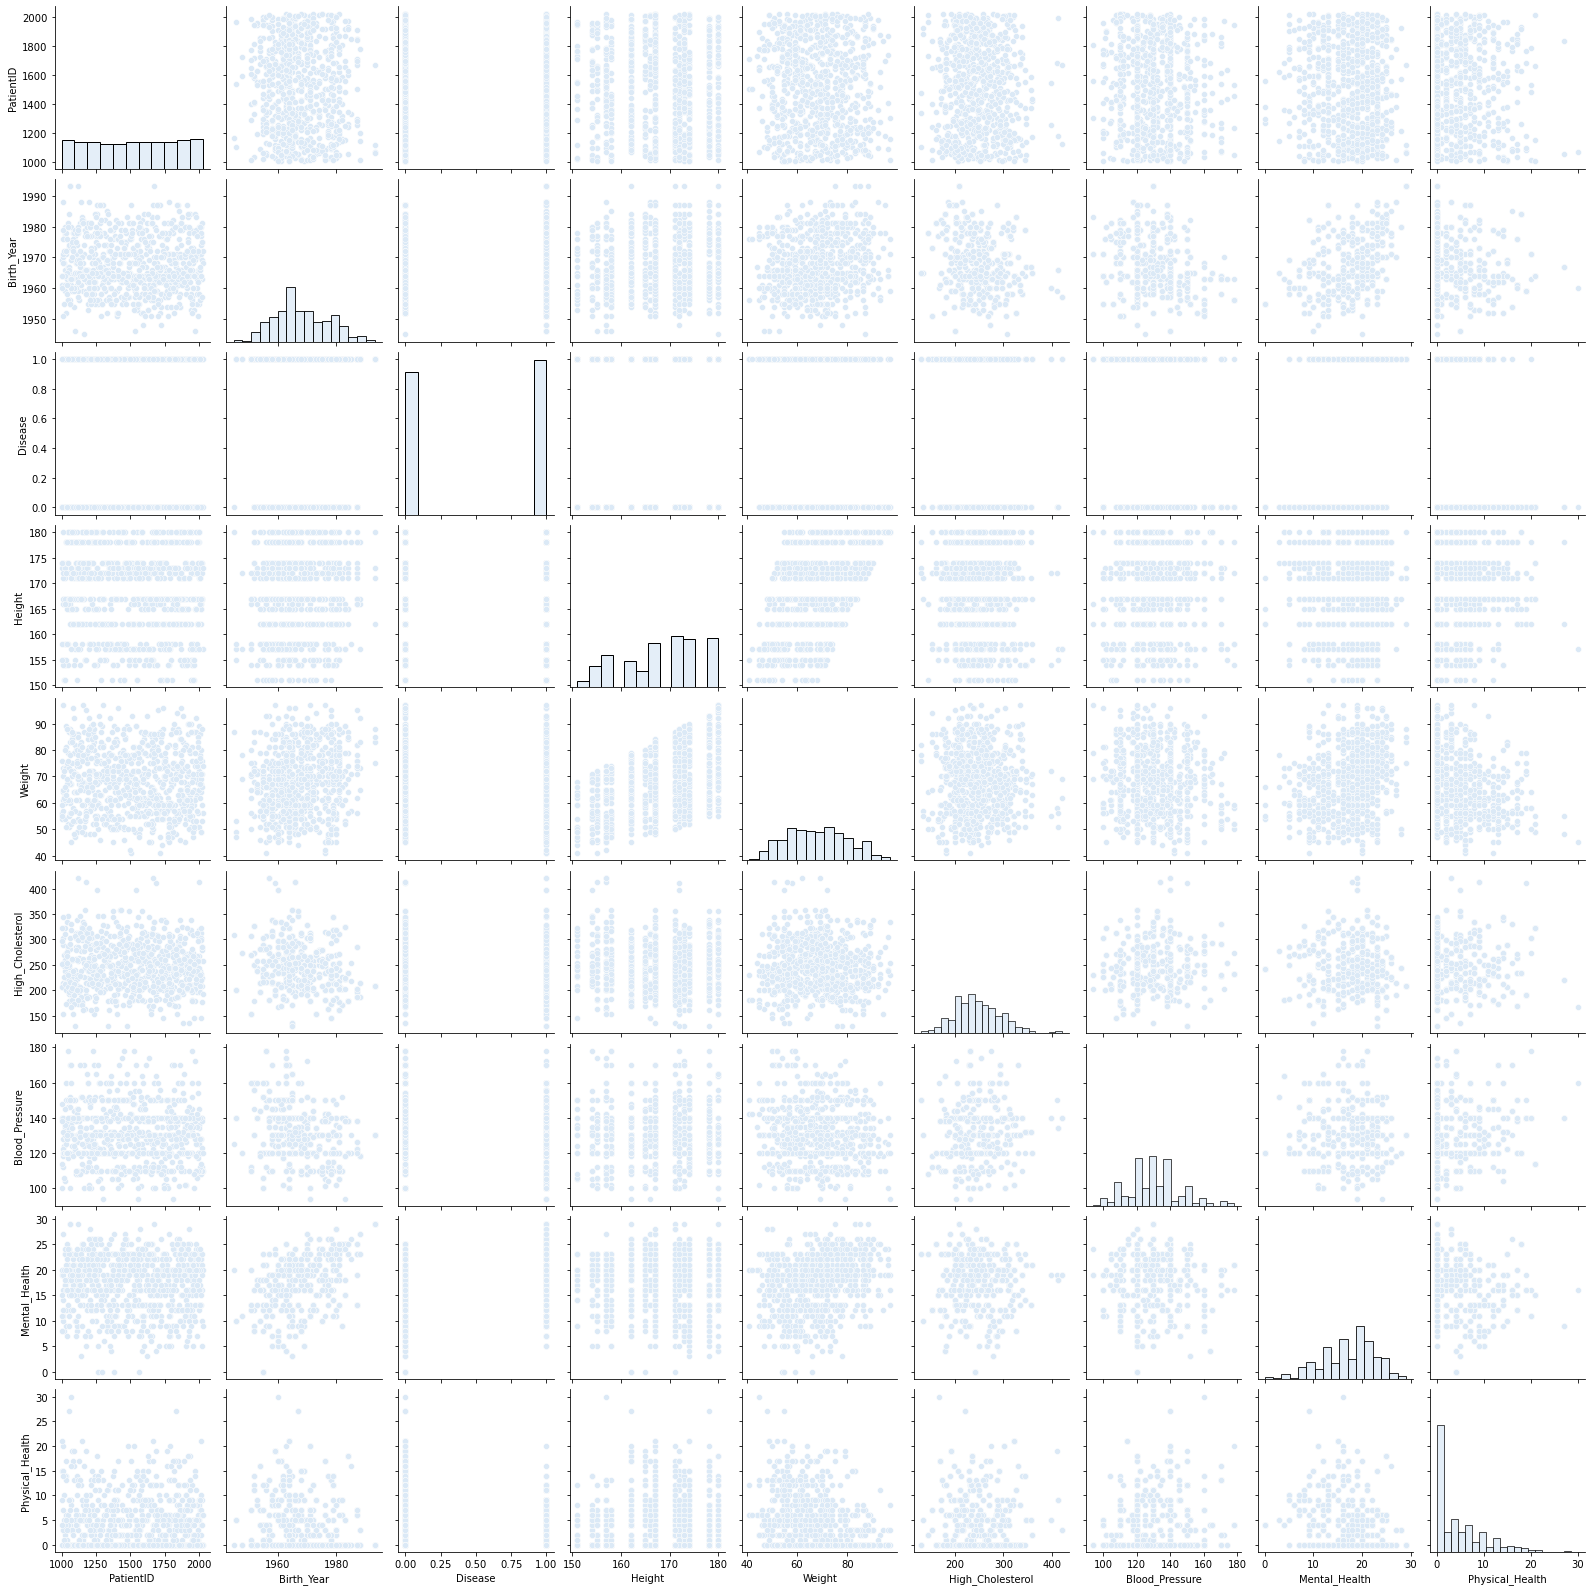

In [33]:
pairplots = sns.pairplot(train_df)

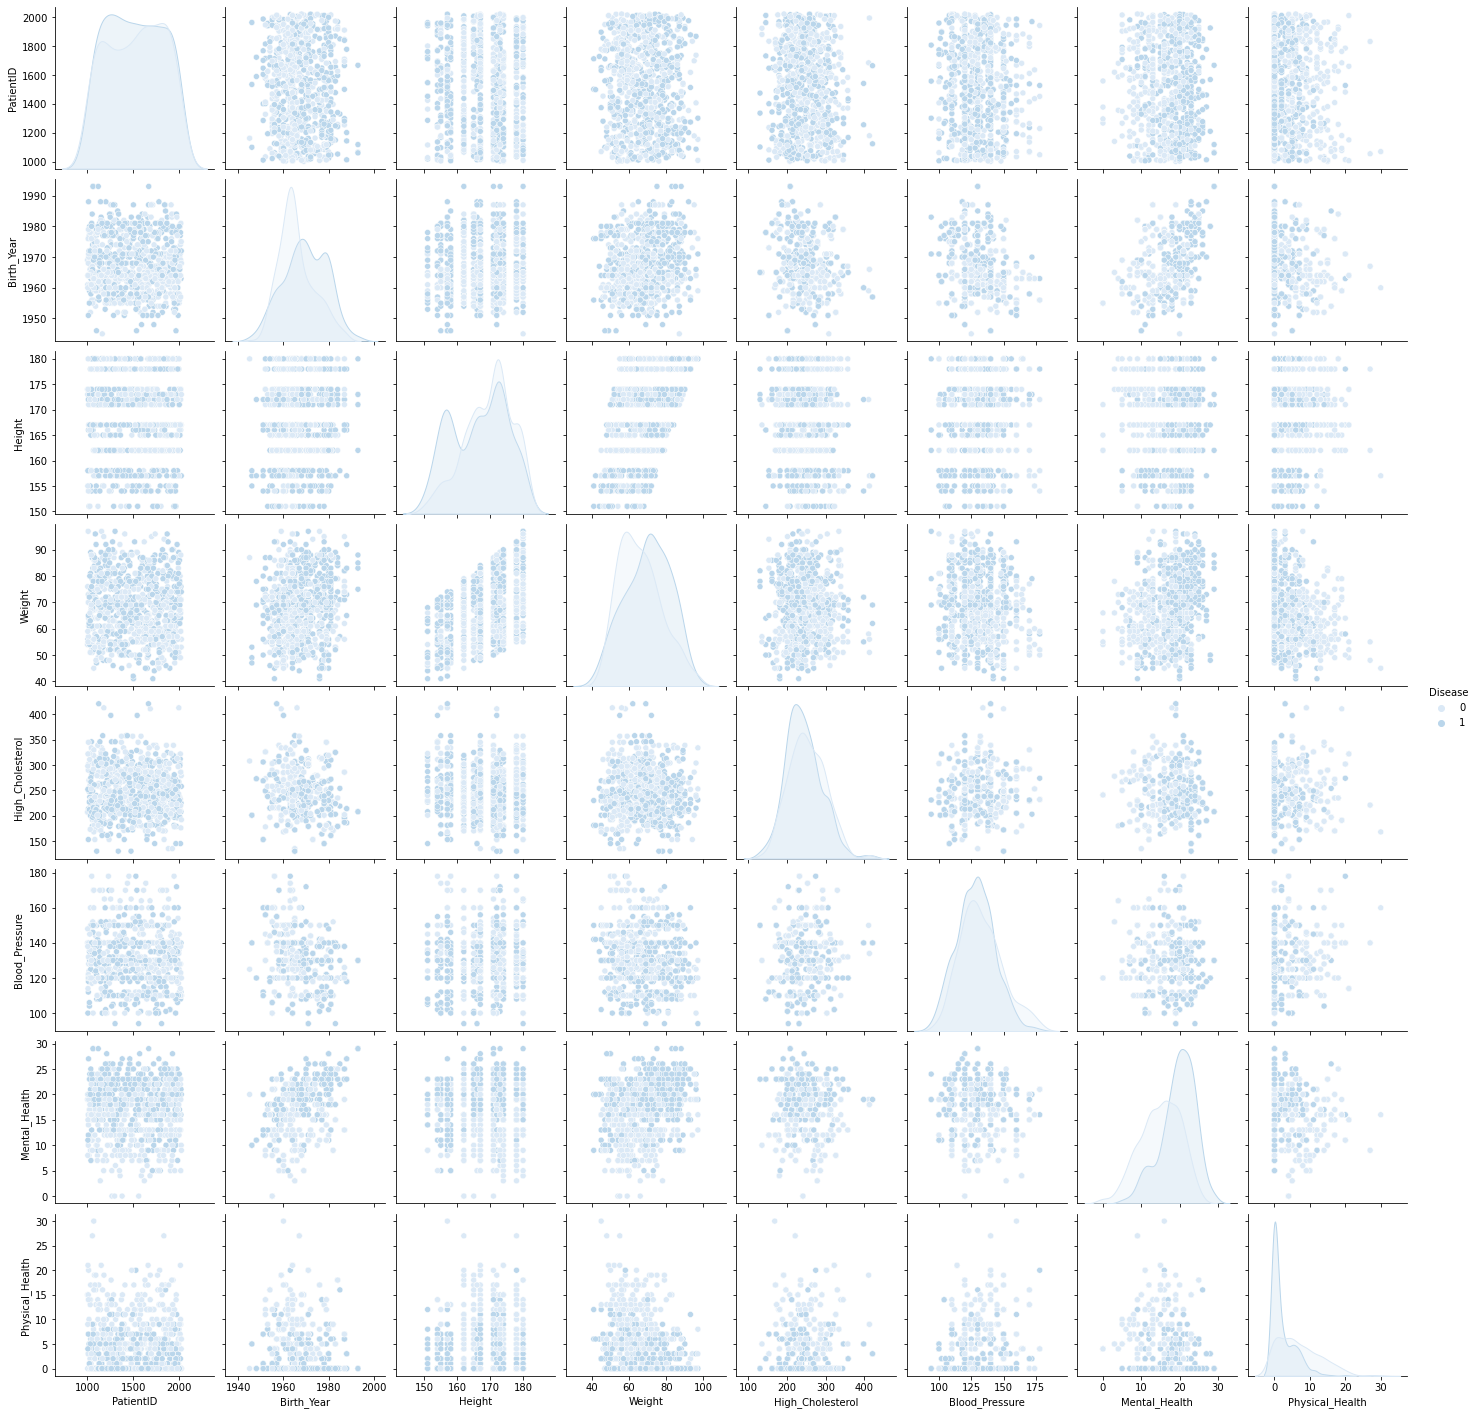

In [34]:
# First Visual Correlations with variable Disease

pairplots_disease = sns.pairplot(train_df, hue = 'Disease')

In [35]:
# By spearman correlation we can check correlation between each element

correlation_spearman = train_df.corr('spearman').style.background_gradient(cmap="Blues")
correlation_spearman

We can check that variable y (Disease) is balanced


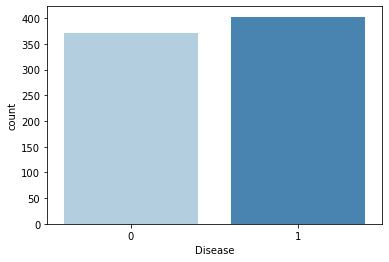

In [36]:
# Investigate the dist of y

sns.countplot(x = 'Disease', data = train_df, palette = 'Blues')
print('\033[1mWe can check that variable y (Disease) is balanced\033[0m')


In [37]:
# Change Yes and No to 1 and 0s

train_df['Exercise'] = train_df['Exercise'].map({'Yes': 1, 'No': 0})
train_df['Smoking_Habit'] = train_df['Smoking_Habit'].map({'Yes': 1, 'No': 0})
train_df

PatientID                    Name  Birth_Year                    Region  \
0         1167      Mrs. Stephanie Gay        1965                    London   
1         1805        Mr. Sherman Nero        1969                South West   
2         1557         Mr. Mark Boller        1974  Yorkshire and the Humber   
3         1658        Mr. David Caffee        1958                    London   
4         1544        Mr. Gerald Emery        1968                South East   
..         ...                     ...         ...                       ...   
794       1912      Mr. Mike Jefferson        1987  Yorkshire and the Humber   
795       1909        Mr. Philip Klink        1972             East Midlands   
796       1386    Mrs. Jackie Valencia        1980                North West   
798       1662   Mr. Florencio Doherty        1975           East of England   
799       1117  Mr. Freddie Vermillion        1979                    London   

                                       Education  Disease  Smoking_Habit  \
0    High School Incomplete (10th to 11th grade)        1              0   
1    High School Incomplete (10th to 11th grade)        1              0   
2           Elementary School (1st to 9th grade)        1              0   
3          University Complete (3 or more years)        0              0   
4           University Incomplete (1 to 2 years)        1              0   
..                                           ...      ...            ...   
794                         High School Graduate        0              0   
795  High School Incomplete (10th to 11th grade)        0              0   
796         Elementary School (1st to 9th grade)        1              0   
798         Elementary School (1st to 9th grade)        1              0   
799         Elementary School (1st to 9th grade)        0              0   

                          Drinking_Habit  Exercise  \
0    I usually consume alcohol every day         1   
1     I consider myself a social drinker         1   
2     I consider myself a social drinker         0   
3    I usually consume alcohol every day         1   
4     I consider myself a social drinker         0   
..                                   ...       ...   
794  I usually consume alcohol every day         1   
795   I consider myself a social drinker         1   
796  I usually consume alcohol every day         0   
798  I usually consume alcohol every day         0   
799   I consider myself a social drinker         1   

                                         Fruit_Habit  \
0    Less than 1. I do not consume fruits every day.   
1    Less than 1. I do not consume fruits every day.   
2    Less than 1. I do not consume fruits every day.   
3    Less than 1. I do not consume fruits every day.   
4                  1 to 2 pieces of fruit in average   
..                                               ...   
794  Less than 1. I do not consume fruits every day.   
795  Less than 1. I do not consume fruits every day.   
796  Less than 1. I do not consume fruits every day.   
798  Less than 1. I do not consume fruits every day.   
799  Less than 1. I do not consume fruits every day.   

                                        Water_Habit  Height  Weight  \
0                  Between one liter and two liters     155      67   
1                  Between one liter and two liters     173      88   
2    More than half a liter but less than one liter     162      68   
3    More than half a liter but less than one liter     180      66   
4    More than half a liter but less than one liter     180      58   
..                                              ...     ...     ...   
794                Between one liter and two liters     173      74   
795                Between one liter and two liters     178      61   
796                Between one liter and two liters     157      61   
798  More than half a liter but less than one liter     165      75   
799                         

In [38]:
# Separate names with Patient ID for a separated DataFrame 

PatientNameID = train_df[['PatientID','Name']]
PatientNameID

# Drop Name, once those are already saved in other df, in order to have only numerica features 
train_df.drop('Name', axis= 1, inplace = True)


In [39]:
# Change categorical variables into numeric representation

categorical_features = ['Region','Education','Drinking_Habit','Fruit_Habit','Water_Habit','Checkup','Diabetes']
train_df = pd.get_dummies(train_df, columns = categorical_features)
train_df

PatientID  Birth_Year  Disease  Smoking_Habit  Exercise  Height  Weight  \
0         1167        1965        1              0         1     155      67   
1         1805        1969        1              0         1     173      88   
2         1557        1974        1              0         0     162      68   
3         1658        1958        0              0         1     180      66   
4         1544        1968        1              0         0     180      58   
..         ...         ...      ...            ...       ...     ...     ...   
794       1912        1987        0              0         1     173      74   
795       1909        1972        0              0         1     178      61   
796       1386        1980        1              0         0     157      61   
798       1662        1975        1              0         0     165      75   
799       1117        1979        0              0         1     173      70   

     High_Cholesterol  Blood_Pressure  Mental_Health  ...  \
0                 358             120             21  ...   
1                 230             142              9  ...   
2                 226             122             26  ...   
3                 313             125             13  ...   
4                 277             125             18  ...   
..                ...             ...            ...  ...   
794               202             120             13  ...   
795               204             144             12  ...   
796               213             120             23  ...   
798               208             112             16  ...   
799               181             120             11  ...   

     Water_Habit_Less than half a liter  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   
..                                  ...   
794                                   0   
795                                   0   
796                                   0   
798                                   0   
799                                   1   

     Water_Habit_More than half a liter but less than one liter  \
0                                                    0            
1                                                    0            
2                                                    1            
3                                                    1            
4                                                    1            
..                                                 ...            
794                                                  0            
795                                                  0            
796                                                  0            
798                                                  1            
799                                                  0            

     Checkup_Less than 3 years but more than 1 year  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   
..                                              ...   
794                                               0   
795                                               0   
796                                               0   
798                                               0   
799                                               0   

     Checkup_Less than three months  Checkup_More than 3 years  \
0                                 0                          1   
1                                 0                          0   
2                                 0                          1   
3                                 0                          0  

>### B. Testing Data

***

In [40]:
# No case sentitivity problems in London in Testing df

test_df['Region'].unique()

array(['East Midlands', 'Yorkshire and the Humber', 'West Midlands',
       'North East', 'South West', 'London', 'South East',
       'East of England', 'North West'], dtype=object)

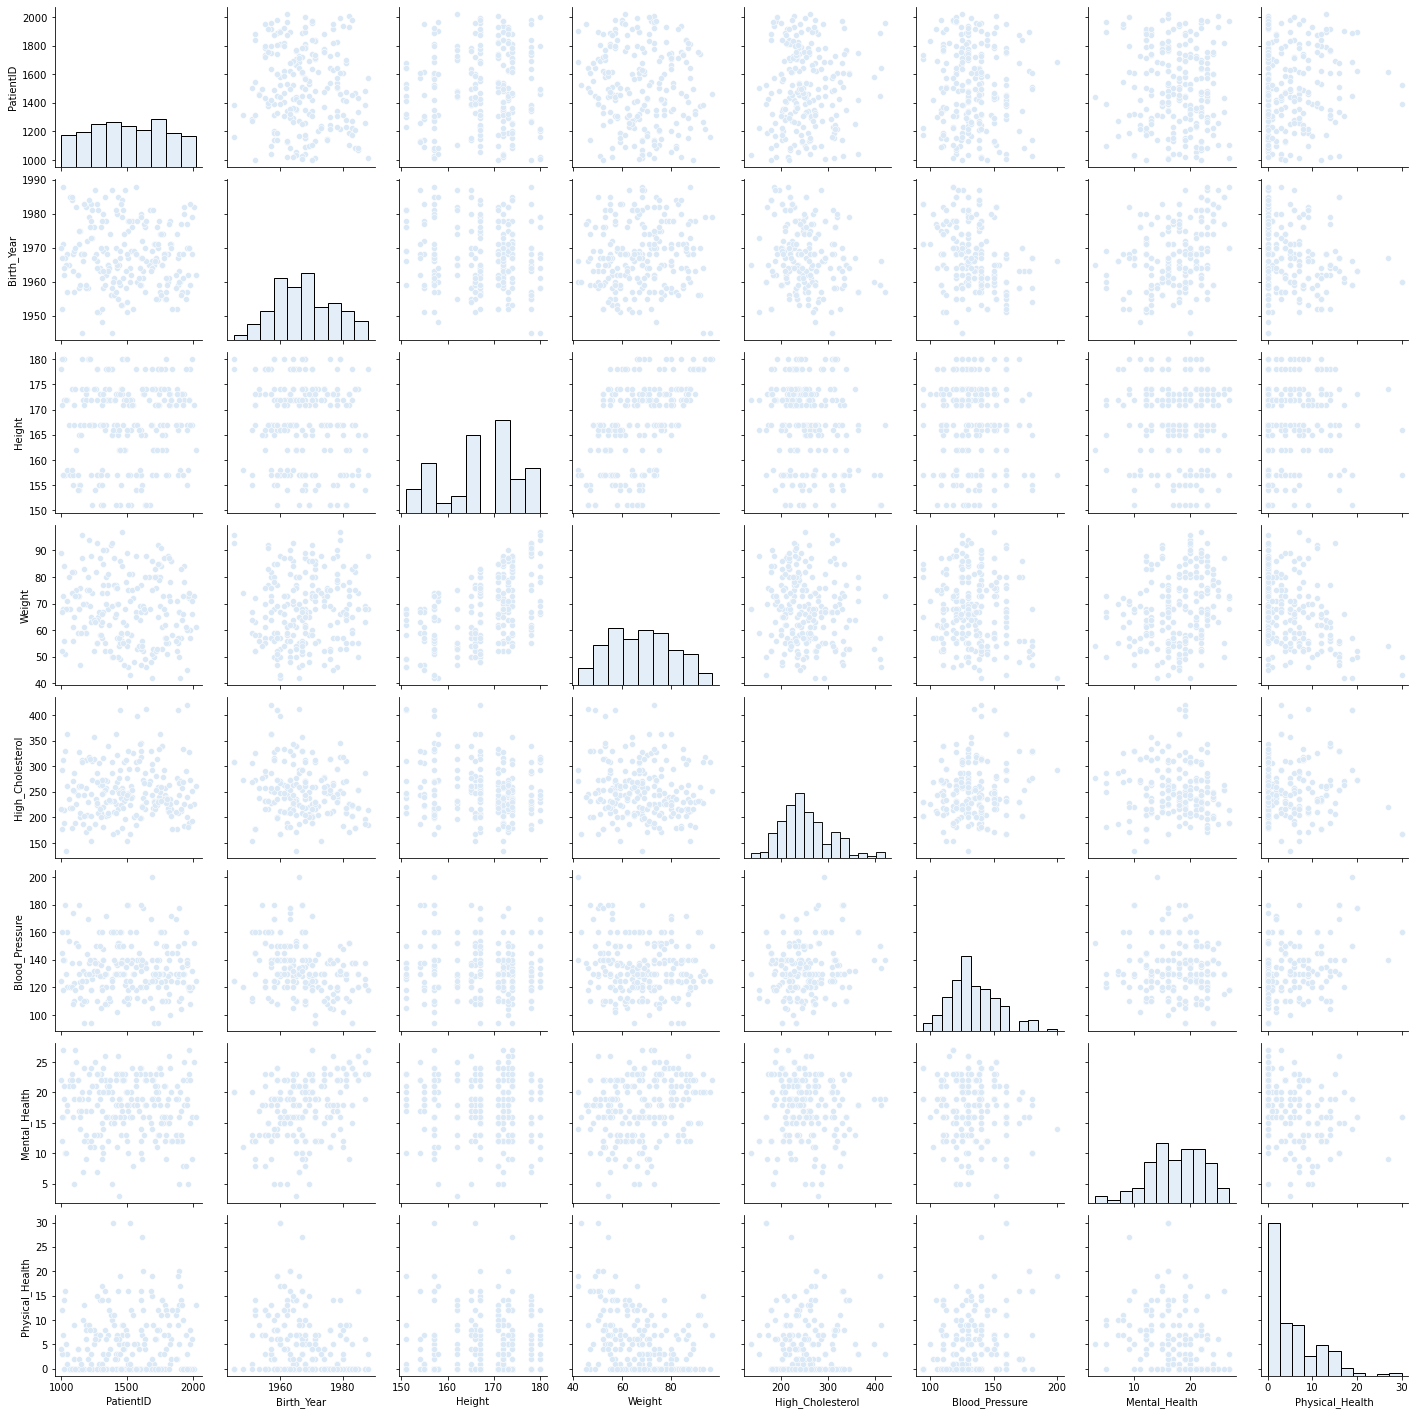

In [41]:
# Visualize the data using pairplots

pairplots = sns.pairplot(test_df)

In [42]:
# By spearman correlation we can check correlation between each element

correlation_spearman = test_df.corr('spearman').style.background_gradient(cmap="Blues")
correlation_spearman

In [43]:
# Change Yes and No to 1 and 0s

test_df['Exercise'] = test_df['Exercise'].map({'Yes': 1, 'No': 0})
test_df['Smoking_Habit'] = test_df['Smoking_Habit'].map({'Yes': 1, 'No': 0})
test_df

PatientID                   Name  Birth_Year                    Region  \
0         1343    Mr. Ricardo Sherman        1970             East Midlands   
1         1727  Mr. Jessie Strickland        1966  Yorkshire and the Humber   
2         1828     Mr. Robert Foreman        1978             West Midlands   
3         1155     Mr. Edwin Ferguson        1968  Yorkshire and the Humber   
4         1020      Mr. Eliseo Krefft        1962             East Midlands   
..         ...                    ...         ...                       ...   
220       1000      Mr. John Eichhorn        1970             East Midlands   
221       1256    Mrs. Tiffany Medley        1987             West Midlands   
222       1318      Mr. Kenneth Crase        1963             East Midlands   
223       1953    Mrs. Tracy Williams        1977             East Midlands   
224       1757       Mr. Chris Hoskin        1956             West Midlands   

                                       Education  Smoking_Habit  \
0           Elementary School (1st to 9th grade)              1   
1          University Complete (3 or more years)              0   
2    High School Incomplete (10th to 11th grade)              0   
3    High School Incomplete (10th to 11th grade)              0   
4    High School Incomplete (10th to 11th grade)              0   
..                                           ...            ...   
220         University Incomplete (1 to 2 years)              0   
221        University Complete (3 or more years)              0   
222                         High School Graduate              0   
223  High School Incomplete (10th to 11th grade)              0   
224        University Complete (3 or more years)              0   

                          Drinking_Habit  Exercise  \
0    I usually consume alcohol every day         0   
1     I consider myself a social drinker         0   
2    I usually consume alcohol every day         1   
3    I usually consume alcohol every day         0   
4     I consider myself a social drinker         0   
..                                   ...       ...   
220  I usually consume alcohol every day         0   
221  I usually consume alcohol every day         0   
222  I usually consume alcohol every day         1   
223   I consider myself a social drinker         1   
224   I consider myself a social drinker         0   

                                         Fruit_Habit  \
0    Less than 1. I do not consume fruits every day.   
1    Less than 1. I do not consume fruits every day.   
2    Less than 1. I do not consume fruits every day.   
3    Less than 1. I do not consume fruits every day.   
4    Less than 1. I do not consume fruits every day.   
..                                               ...   
220                3 to 4 pieces of fruit in average   
221  Less than 1. I do not consume fruits every day.   
222                1 to 2 pieces of fruit in average   
223  Less than 1. I do not consume fruits every day.   
224  Less than 1. I do not consume fruits every day.   

                                        Water_Habit  Height  Weight  \
0                  Between one liter and two liters     172      80   
1    More than half a liter but less than one liter     171      80   
2                  Between one liter and two liters     171      78   
3                            Less than half a liter     174      87   
4                            Less than half a liter     172      56   
..                                              ...     ...     ...   
220  More than half a liter but less than one liter     178      89   
221                          Less than half a liter     154      63   
222                Between one liter and two liters     173      90   
223  More than half a liter but less than one liter     155      45   
224                Between one liter and two liters     178      91   

     High_Cholesterol  Blood_Pressure  Mental_Health  Physical_Health  \
0  

In [44]:
# Separate names with Patient ID for a separated DataFrame 

PatientNameID_test = test_df[['PatientID','Name']]
PatientNameID_test

# Drop Name, once those are already saved in other df, in order to have only numerica features 
test_df.drop('Name', axis= 1, inplace = True)


In [45]:
# Check the objects in testing df
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225 entries, 0 to 224
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   PatientID         225 non-null    int64 
 1   Birth_Year        225 non-null    int64 
 2   Region            225 non-null    object
 3   Education         225 non-null    object
 4   Smoking_Habit     225 non-null    int64 
 5   Drinking_Habit    225 non-null    object
 6   Exercise          225 non-null    int64 
 7   Fruit_Habit       225 non-null    object
 8   Water_Habit       225 non-null    object
 9   Height            225 non-null    int64 
 10  Weight            225 non-null    int64 
 11  High_Cholesterol  225 non-null    int64 
 12  Blood_Pressure    225 non-null    int64 
 13  Mental_Health     225 non-null    int64 
 14  Physical_Health   225 non-null    int64 
 15  Checkup           225 non-null    object
 16  Diabetes          225 non-null    object
dtypes: int64(10), ob

In [46]:
# Change categorical variables into numeric representation

categorical_features_test = ['Region','Education','Drinking_Habit','Fruit_Habit','Water_Habit','Checkup','Diabetes']
test_df = pd.get_dummies(test_df, columns = categorical_features_test)
test_df

PatientID  Birth_Year  Smoking_Habit  Exercise  Height  Weight  \
0         1343        1970              1         0     172      80   
1         1727        1966              0         0     171      80   
2         1828        1978              0         1     171      78   
3         1155        1968              0         0     174      87   
4         1020        1962              0         0     172      56   
..         ...         ...            ...       ...     ...     ...   
220       1000        1970              0         0     178      89   
221       1256        1987              0         0     154      63   
222       1318        1963              0         1     173      90   
223       1953        1977              0         1     155      45   
224       1757        1956              0         0     178      91   

     High_Cholesterol  Blood_Pressure  Mental_Health  Physical_Health  ...  \
0                 203             172             20                2  ...   
1                 225             130             21                0  ...   
2                 237             130             24                1  ...   
3                 313             108             19                0  ...   
4                 189             140             19               14  ...   
..                ...             ...            ...              ...  ...   
220               216             125             22                4  ...   
221               187             138             25                6  ...   
222               181             140             20                0  ...   
223               240             138             18                0  ...   
224               232             160             15               11  ...   

     Water_Habit_Less than half a liter  \
0                                     0   
1                                     0   
2                                     0   
3                                     1   
4                                     1   
..                                  ...   
220                                   0   
221                                   1   
222                                   0   
223                                   0   
224                                   0   

     Water_Habit_More than half a liter but less than one liter  \
0                                                    0            
1                                                    1            
2                                                    0            
3                                                    0            
4                                                    0            
..                                                 ...            
220                                                  1            
221                                                  0            
222                                                  0            
223                                                  1            
224                                                  0            

     Checkup_Less than 3 years but more than 1 year  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   
..                                              ...   
220                                               0   
221                                               0   
222                                               0   
223                                               0   
224                                               1   

     Checkup_Less than three months  Checkup_More than 3 years  \
0                                 0                          0   
1                                 0                          0   
2                                 

***
# 4. Feature Selection
<ul>
    <li>Split the data into X and y</li>
    <li>Run a Tree-based estimators</li>
    <li>Run Feature Importance</li>
    <li>Split the data into new variables only regarding the importante variables</li>
</ul>

***

In [81]:
# Split the data into x and y

X = train_df.drop(['Disease'], axis = 1) 
y = train_df['Disease']

In [82]:
DecisionTree = DecisionTreeClassifier(random_state=0,
                                      criterion= 'entropy',
                                      max_depth=10)
DecisionTree.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)

In [83]:
# Feature Importance

fi_col = []
fi = []

for i,column in enumerate(train_df.drop(['Disease'], axis = 1)):
    fi_col.append(column)
    fi.append(DecisionTree.feature_importances_[i])

fi_DecisionTree = pd.DataFrame(zip(fi_col, fi), columns = ['Feature','Feature Importance'])
fi_DecisionTree = fi_DecisionTree.sort_values('Feature Importance', ascending = False).reset_index().drop('index',axis=1)
fi_DecisionTree

# Creating list of columns to keep, only include feactures that contribute to model prediction
# Only regarding Importance above 0.02

DecisionTree_columns_to_keep = fi_DecisionTree.loc[(fi_DecisionTree['Feature Importance'] > 0.02)]

DT_columns_to_keep = DecisionTree_columns_to_keep['Feature'].values

X = X[DT_columns_to_keep]

X

Checkup_More than 3 years  Birth_Year  \
0                            1        1965   
1                            0        1969   
2                            1        1974   
3                            0        1958   
4                            1        1968   
..                         ...         ...   
794                          0        1987   
795                          0        1972   
796                          1        1980   
798                          1        1975   
799                          0        1979   

     Diabetes_Neither I nor my immediate family have diabetes.  \
0                                                    1           
1                                                    1           
2                                                    1           
3                                                    0           
4                                                    0           
..                                                 ...           
794                                                  1           
795                                                  1           
796                                                  0           
798                                                  1           
799                                                  1           

     Physical_Health  \
0                  2   
1                  0   
2                  0   
3                  8   
4                  2   
..               ...   
794                7   
795                4   
796                0   
798                0   
799               12   

     Fruit_Habit_Less than 1. I do not consume fruits every day.  \
0                                                    1             
1                                                    1             
2                                                    1             
3                                                    1             
4                                                    0             
..                                                 ...             
794                                                  1             
795                                                  1             
796                                                  1             
798                                                  1             
799                                                  1             

     Mental_Health  High_Cholesterol  Weight  \
0               21               358      67   
1                9               230      88   
2               26               226      68   
3               13               313      66   
4               18               277      58   
..             ...               ...     ...   
794             13               202      74   
795             12               204      61   
796             23               213      61   
798             16               208      75   
799             11               181      70   

     Fruit_Habit_1 to 2 pieces of fruit in average  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                1   
..                                             ...   
794                                              0   
795                                              0   
796                                              0   
798                                              0   
799                                              0   

     Drinking_Habit_I consider myself a social drinker  Blood_Pressure  Height  
0                                                    0             120     155  
1                                                    1             142     173  
2                                                    1             122     162  
3  

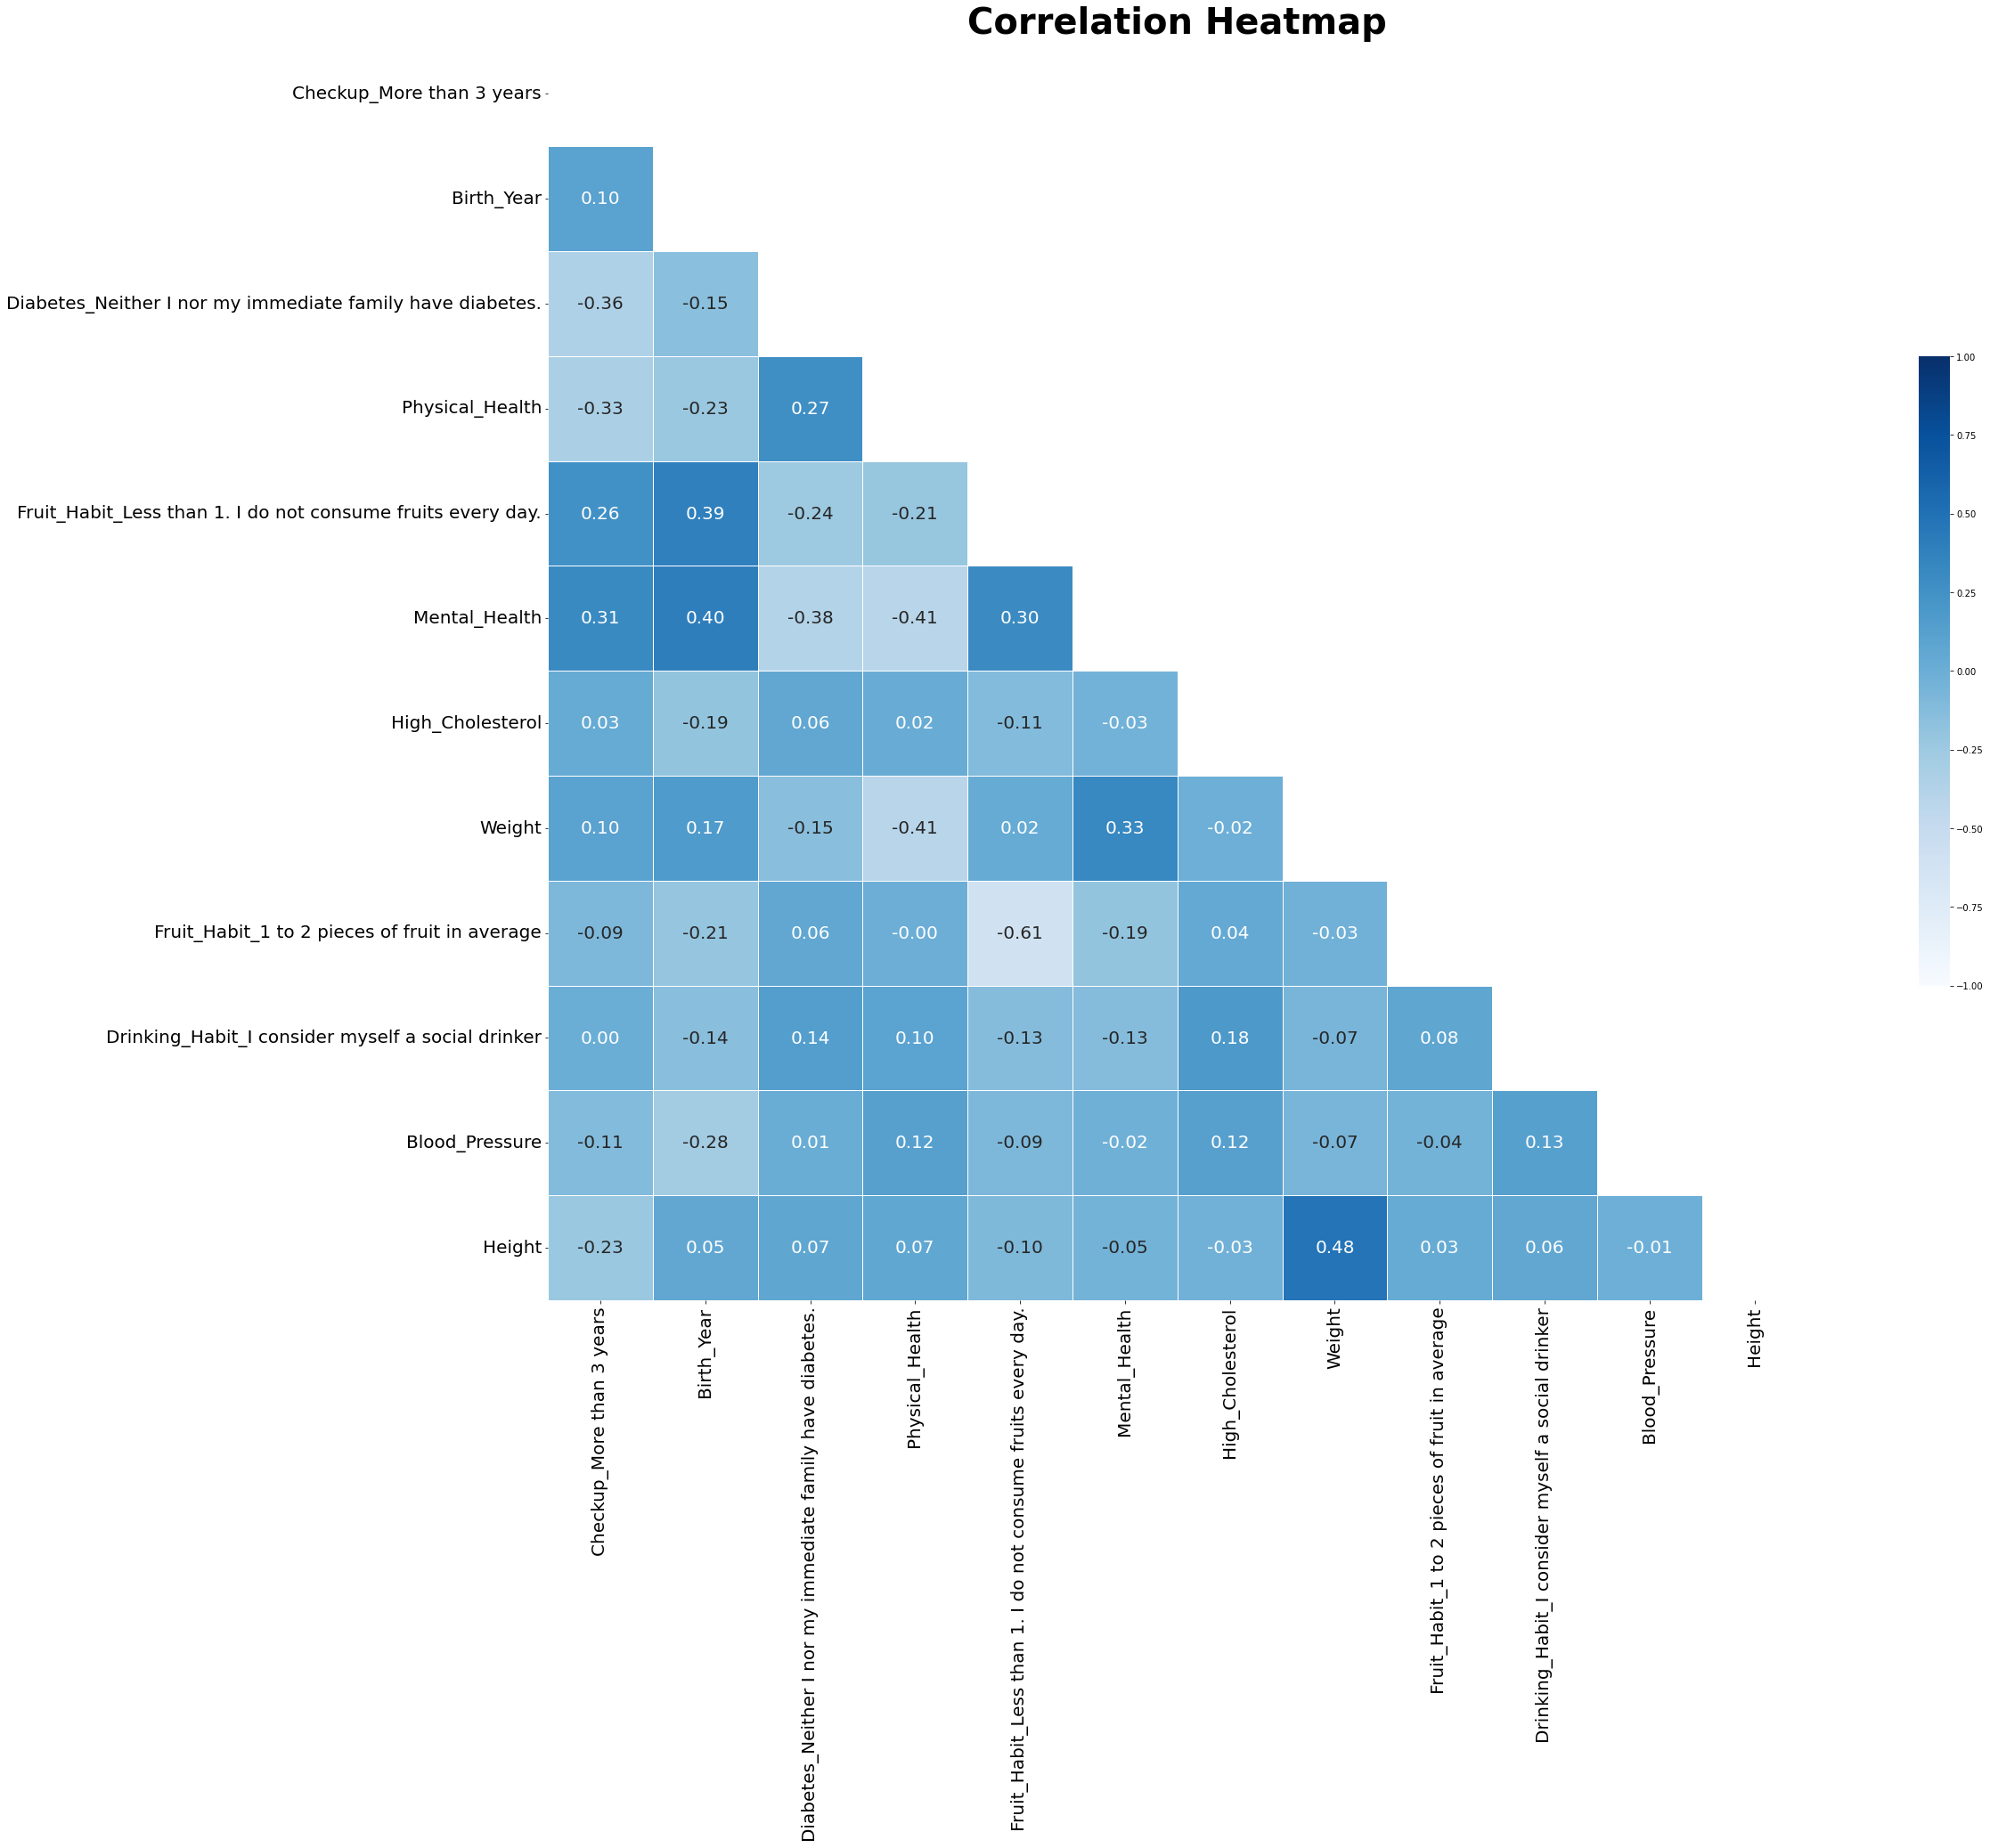

In [84]:
# Correlations analysis
# Plot
cmap = sns.color_palette('Blues', as_cmap=True)

# Computing the correlation matrix
corr = X.corr('spearman')

# Generating a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize = (45, 26))
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 1, vmin = -1, center = 0,
            square = True, linewidths = 1, cbar_kws = {'shrink': 0.5}, annot = True, fmt = '.2f', annot_kws={"size":20})

#customize
plt.title('Correlation Heatmap',fontsize = 40, fontweight = 'bold')

plt.show()

In [102]:
# First split
X_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size = 0.8,
                                                    test_size = 0.2,
                                                    random_state = 5
                                                   )

print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

# IMPORTANTE : the larger the 'test_size' the highest the accurancy  

(155, 12)
(620,)
(155,)


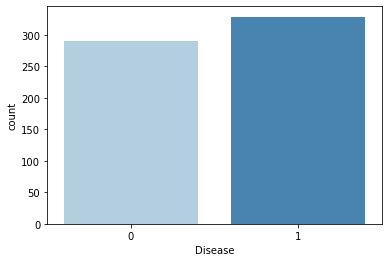

In [103]:
ax = sns.countplot(x = y_train, palette = 'Blues')

### Teorical definition of Linear and Logistic Regression 

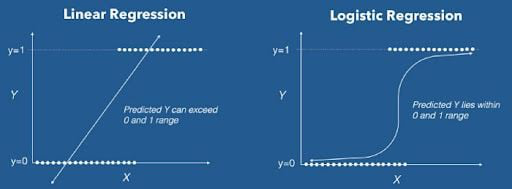

In [53]:
im = Image.open(requests.get('https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/2_what-is-logistic-regression.jpeg', stream=True).raw)
im 

***
# 5. Running Models in Training Environment
<ul>
    <li>Trainning our model</li>
    <li>Predict</li>
    <li>Get Coeficiente, Scores and Accuracy</li>
</ul>

***

>### A. Logistic Regression Model

***
<ul>
        <li>Accuracy on Train and Test</li>
        <li>Classification Report</li>
        <li>Confusion Matrix</li>
        <li>Sensitivity, hit rate, recall, or positive rate</li>
        <li>Precision</li>
        <li>Positive Precision Value</li>
</ul>

In [105]:
# Trainning our model

logistic_regression_model = LogisticRegression(random_state = 0,
                                               solver='lbfgs')
logistic_regression_model.fit(X_train, y_train)


LogisticRegression(random_state=0)

In [106]:
# predict - Predict class labels for samples in x
    # Have the shape correct, because this prediction have 557 results which is the same number of results in x_train

y_pred_logistic_regression = logistic_regression_model.predict(x_test)
y_pred_logistic_regression

# predict_proba - Probability estimates 

y_pred_proba_logistic_regression = logistic_regression_model.predict_proba(x_test)

# coef_ - Coefficient of the features in the decision function

coef_logistic_regression = logistic_regression_model.coef_


The Training Accuracy is:  0.8
The Testing Accuracy is:  0.7419354838709677

               precision    recall  f1-score   support

           0       0.78      0.70      0.74        81
           1       0.71      0.78      0.74        74

    accuracy                           0.74       155
   macro avg       0.74      0.74      0.74       155
weighted avg       0.75      0.74      0.74       155



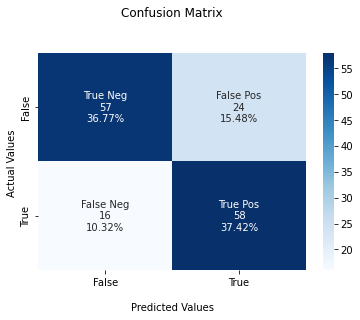

The True Positive Rate is:  [0.7037037  0.78378378]
The Average True Positive Rate is:  0.7437437437437437

This reflect that out of the total Diseased have 0,8202 of them correct, and out of the tota Non Diseased have 0,9103 of them correct.

The Positive Precision Value is:  0.7437437437437437


In [107]:
# Accuracy on Train
print('\033[1mThe Training Accuracy is:\033[0m ', logistic_regression_model.score(X_train, y_train))

# Accuracy on Test
print('\033[1mThe Testing Accuracy is:\033[0m ', logistic_regression_model.score(x_test, y_test))

# Classification Report
print('\n',classification_report(y_test, y_pred_logistic_regression))

# Confusion Matrix function

cm_logistic_regression = confusion_matrix(y_test, y_pred_logistic_regression)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_logistic_regression.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_logistic_regression.flatten()/np.sum(cm_logistic_regression)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_logistic_regression, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP_logistic_regression = cm_logistic_regression.sum(axis=0) - np.diag(cm_logistic_regression)

FN_logistic_regression = cm_logistic_regression.sum(axis=1) - np.diag(cm_logistic_regression)

TP_logistic_regression = np.diag(cm_logistic_regression)

TN_logistic_regression = cm_logistic_regression.sum() - (FP_logistic_regression - FN_logistic_regression - TP_logistic_regression)

# Sensitivity, hit rate, recall, or positive rate

TPR_logistic_regression = TP_logistic_regression / (TP_logistic_regression + FN_logistic_regression)
print('\033[1mThe True Positive Rate is:\033[0m ', TPR_logistic_regression)
print('\033[1mThe Average True Positive Rate is:\033[0m ', TPR_logistic_regression.sum()/2)
print('\nThis reflect that out of the total Diseased have 0,8202 of them correct, and out of the tota Non Diseased have 0,9103 of them correct.')

# Precision or positive predictive value

PPV_logistic_regression = TP_logistic_regression / (TP_logistic_regression + FP_logistic_regression)
print('\n\033[1mThe Positive Precision Value is:\033[0m ', TPR_logistic_regression.sum()/2)




>### B. Decision Tree Model

***
<ul>
        <li>Accuracy on Train and Test</li>
        <li>Classification Report</li>
        <li>Confusion Matrix</li>
        <li>Sensitivity, hit rate, recall, or positive rate</li>
        <li>Precision</li>
        <li>Positive Precision Value</li>
</ul>

In [114]:
# Trainning our model

decision_tree_model = DecisionTreeClassifier(criterion = 'entropy',
                                             max_depth = 10,
                                             min_samples_split = 2,
                                             max_features = 'auto',
                                             class_weight = 'balanced',
                                             min_samples_leaf = 1,
                                             random_state = 70
                                            )
decision_tree_model.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, max_features='auto', random_state=70)

In [115]:
# predict - Predict class labels for samples in x
    # Have the shape correct, because this prediction have 557 results which is the same number of results in x_train

y_pred_decision_tree = decision_tree_model.predict(x_test)
y_pred_decision_tree

# predict_proba - Probability estimates 

y_pred_proba_decision_tree = decision_tree_model.predict_proba(x_test)


The Training Accuracy is:  0.9870967741935484
The Testing Accuracy is:  0.967741935483871

               precision    recall  f1-score   support

           0       1.00      0.94      0.97        81
           1       0.94      1.00      0.97        74

    accuracy                           0.97       155
   macro avg       0.97      0.97      0.97       155
weighted avg       0.97      0.97      0.97       155



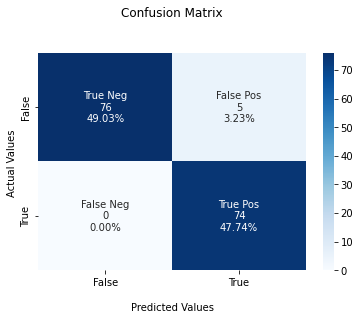

The True Positive Rate is:  [0.9382716 1.       ]
The Average True Positive Rate is:  0.9691358024691358

The Positive Precision Value is:  0.9691358024691358


In [116]:
# Accuracy on Train
print('\033[1mThe Training Accuracy is:\033[0m ', decision_tree_model.score(X_train, y_train))

# Accuracy on Test
print('\033[1mThe Testing Accuracy is:\033[0m ', decision_tree_model.score(x_test, y_test))

# Classification Report
print('\n',classification_report(y_test, y_pred_decision_tree))

# Confusion Matrix function

cm_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_decision_tree.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_decision_tree.flatten()/np.sum(cm_decision_tree)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_decision_tree, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP_decision_tree = cm_decision_tree.sum(axis=0) - np.diag(cm_decision_tree)

FN_decision_tree = cm_decision_tree.sum(axis=1) - np.diag(cm_decision_tree)

TP_decision_tree = np.diag(cm_decision_tree)

TN_decision_tree = cm_decision_tree.sum() - (FP_decision_tree - FN_decision_tree - TP_decision_tree)

# Sensitivity, hit rate, recall, or positive rate

TPR_decision_tree = TP_decision_tree / (TP_decision_tree + FN_decision_tree)
print('\033[1mThe True Positive Rate is:\033[0m ', TPR_decision_tree)
print('\033[1mThe Average True Positive Rate is:\033[0m ', TPR_decision_tree.sum()/2)

# Precision or positive predictive value

PPV_decision_tree = TP_decision_tree / (TP_decision_tree + FP_decision_tree)
print('\n\033[1mThe Positive Precision Value is:\033[0m ', TPR_decision_tree.sum()/2)




>### C. Random Forest Model

***
<ul>
        <li>Grid Search Hyperparameter Tuning</li>
        <li>Accuracy on Train and Test</li>
        <li>Classification Report</li>
        <li>Confusion Matrix</li>
        <li>Sensitivity, hit rate, recall, or positive rate</li>
        <li>Precision</li>
        <li>Positive Precision Value</li>
</ul>

In [117]:
# Trainning our model

random_forest_model = RandomForestClassifier(criterion = 'entropy',
                                 max_depth = 10,
                                 min_samples_split = 2,
                                 max_features = 'auto',
                                 bootstrap = False,
                                 oob_score = False,
                                 warm_start = False,
                                 class_weight = 'balanced',
                                 min_samples_leaf = 1,
                                 random_state = 35,
                                 #n_estimators = 10
                                 )

random_forest_model.fit(X_train, y_train)


RandomForestClassifier(bootstrap=False, class_weight='balanced',
                       criterion='entropy', max_depth=10, random_state=35)

In [118]:
# predict - Predict class labels for samples in x
    # Have the shape correct, because this prediction have 557 results which is the same number of results in x_train

y_pred_random_forest = random_forest_model.predict(x_test)
y_pred_random_forest

# predict_proba - Probability estimates 

y_pred_proba_random_forest = random_forest_model.predict_proba(x_test)


The Training Accuracy is:  1.0
The Testing Accuracy is:  1.0

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        74

    accuracy                           1.00       155
   macro avg       1.00      1.00      1.00       155
weighted avg       1.00      1.00      1.00       155



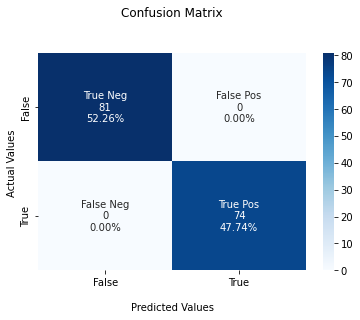

The True Positive Rate is:  [1. 1.]
The Average True Positive Rate is:  1.0

The Positive Precision Value is:  1.0


In [119]:
# Accuracy on Train
print('\033[1mThe Training Accuracy is:\033[0m ', random_forest_model.score(X_train, y_train))

# Accuracy on Test
print('\033[1mThe Testing Accuracy is:\033[0m ', random_forest_model.score(x_test, y_test))

# Classification Report
print('\n',classification_report(y_test, y_pred_random_forest))

# Confusion Matrix function

cm_random_forest = confusion_matrix(y_test, y_pred_random_forest)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_random_forest.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_random_forest.flatten()/np.sum(cm_random_forest)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_random_forest, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP_random_forest = cm_random_forest.sum(axis=0) - np.diag(cm_random_forest)

FN_random_forest = cm_random_forest.sum(axis=1) - np.diag(cm_random_forest)

TP_random_forest = np.diag(cm_random_forest)

TN_random_forest = cm_random_forest.sum() - (FP_random_forest - FN_random_forest - TP_random_forest)

# Sensitivity, hit rate, recall, or positive rate

TPR_random_forest = TP_random_forest / (TP_random_forest + FN_random_forest)
print('\033[1mThe True Positive Rate is:\033[0m ', TPR_random_forest)
print('\033[1mThe Average True Positive Rate is:\033[0m ', TPR_random_forest.sum()/2)

# Precision or positive predictive value

PPV_random_forest = TP_random_forest / (TP_random_forest + FP_random_forest)
print('\n\033[1mThe Positive Precision Value is:\033[0m ', TPR_random_forest.sum()/2)




>### D. K Nearest Neighbors Model (KNN)

***
<ul>
        <li>Normalization of Data</li>
        <li>Accuracy on Train and Test</li>
        <li>Classification Report</li>
        <li>Confusion Matrix</li>
        <li>Sensitivity, hit rate, recall, or positive rate</li>
        <li>Precision</li>
        <li>Positive Precision Value</li>
</ul>

***
>> ### __Normalization of Data__

#### 1. MLPClassifier before scalling


In [65]:
MLPclassifier_check = MLPClassifier().fit(X_train, y_train)
MLPclassifier_check.score(x_test, y_test)

0.7419354838709677

#### 2. MinMax Scaler

In [66]:
min_max = MinMaxScaler().fit(X_train)
min_max_X_train = min_max.transform(X_train)
min_max_x_test = min_max.transform(x_test)
model_min_max = MLPClassifier().fit(min_max_X_train, y_train)
model_min_max.score(min_max_x_test, y_test)

0.8903225806451613

#### 3. Rescale between [-1,1]

In [67]:
min_max2 = MinMaxScaler(feature_range = (-1, 1)).fit(X_train)
min_max2_X_train = min_max2.transform(X_train)
min_max2_x_test = min_max2.transform(x_test)
model_min_max2 = MLPClassifier().fit(min_max2_X_train, y_train)
model_min_max2.score(min_max2_x_test, y_test)

0.9096774193548387

#### 4. The RobustScaler

In [68]:
robust = RobustScaler().fit(X_train)
robust_X_train = robust.transform(X_train)
robust_X_test = robust.transform(x_test)
model_robust = MLPClassifier().fit(robust_X_train, y_train)
model_robust.score(robust_X_test, y_test)

0.9161290322580645

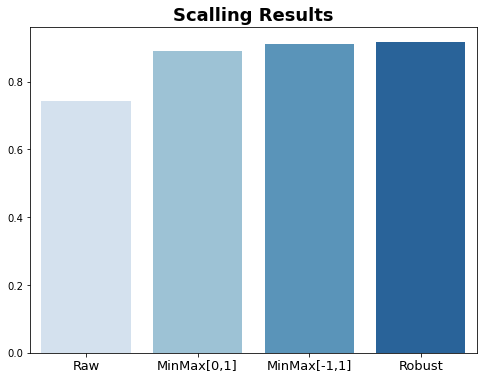

In [69]:
x = ['Raw','MinMax[0,1]','MinMax[-1,1]','Robust']
y = [MLPclassifier_check.score(x_test, y_test),
     model_min_max.score(min_max_x_test, y_test), 
     model_min_max2.score(min_max2_x_test, y_test),
     model_robust.score(robust_X_test, y_test)]

# Plot
plt.figure(figsize = (8,6))
sns.barplot(x, y,palette='Blues')

# Layout
plt.title('Scalling Results', fontsize = 18, fontweight='bold')
plt.xticks(fontsize = 13)

plt.show()

__After check the diferent scalling techniques, the MinMax [0, 1] Scaler and MinMax Scaler had the better score. It'll be used MinMax [0, 1] Scaler.__

In [70]:
# Normalizing data
train_scaler = MinMaxScaler(feature_range = (-1, 1)).fit_transform(X_train)
test_scaler = MinMaxScaler(feature_range = (-1, 1)).fit_transform(x_test)

X_train[X_train.columns] = train_scaler
x_test[x_test.columns] = test_scaler

In [120]:
# Trainning our model
    # p = 1 - Manhatan Distance; 2 - Euclidean Distance

KNN_model = KNeighborsClassifier(n_neighbors = 1,
                                 leaf_size = 1,
                                 p = 1,
                                 weights = 'distance',
                                 algorithm = 'auto' )

KNN_model.fit(X_train, y_train)


KNeighborsClassifier(leaf_size=1, n_neighbors=1, p=1, weights='distance')

In [121]:
# predict - Predict class labels for samples in x
    # Have the shape correct, because this prediction have 557 results which is the same number of results in x_train

y_pred_KNN_model = KNN_model.predict(x_test)
y_pred_KNN_model

# predict_proba - Probability estimates 

y_pred_proba_KNN_model = KNN_model.predict_proba(x_test)


The Training Accuracy is:  1.0
The Testing Accuracy is:  0.9032258064516129

               precision    recall  f1-score   support

           0       0.93      0.88      0.90        81
           1       0.87      0.93      0.90        74

    accuracy                           0.90       155
   macro avg       0.90      0.90      0.90       155
weighted avg       0.91      0.90      0.90       155



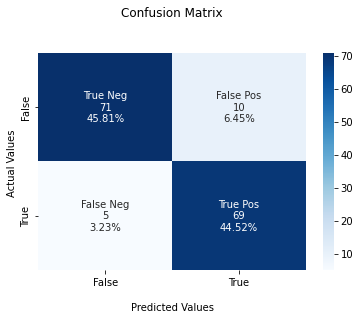

The True Positive Rate is:  [0.87654321 0.93243243]
The Average True Positive Rate is:  0.9044878211544878

The Positive Precision Value is:  0.9044878211544878


In [122]:
# Accuracy on Train
print('\033[1mThe Training Accuracy is:\033[0m ', KNN_model.score(X_train, y_train))

# Accuracy on Test
print('\033[1mThe Testing Accuracy is:\033[0m ', KNN_model.score(x_test, y_test))

# Classification Report
print('\n',classification_report(y_test, y_pred_KNN_model))

# Confusion Matrix function

cm_KNN_model = confusion_matrix(y_test, y_pred_KNN_model)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_KNN_model.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_KNN_model.flatten()/np.sum(cm_KNN_model)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_KNN_model, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP_KNN_model = cm_KNN_model.sum(axis=0) - np.diag(cm_KNN_model)

FN_KNN_model = cm_KNN_model.sum(axis=1) - np.diag(cm_KNN_model)

TP_KNN_model = np.diag(cm_KNN_model)

TN_KNN_model = cm_KNN_model.sum() - (FP_KNN_model - FN_KNN_model - TP_KNN_model)

# Sensitivity, hit rate, recall, or positive rate

TPR_KNN_model = TP_KNN_model / (TP_KNN_model + FN_KNN_model)
print('\033[1mThe True Positive Rate is:\033[0m ', TPR_KNN_model)
print('\033[1mThe Average True Positive Rate is:\033[0m ', TPR_KNN_model.sum()/2)

# Precision or positive predictive value

PPV_KNN_model = TP_KNN_model / (TP_KNN_model + FP_KNN_model)
print('\n\033[1mThe Positive Precision Value is:\033[0m ', TPR_KNN_model.sum()/2)

>### E. Neural Network

***

In [74]:
NeuralNet_model = MLPClassifier(activation = 'tanh',
                        hidden_layer_sizes = 75, 
                        learning_rate = 'constant', 
                        learning_rate_init = .0505, 
                        solver = 'adam', 
                        random_state = 0
                        )

NeuralNet_model.fit(X_train, y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=75,
              learning_rate_init=0.0505, random_state=0)

In [123]:
for i in range(500): 
    # Creating RF Model #99 com ouliers colesterol sem 1800
    NNmodel = MLPClassifier(activation = 'tanh',
                        hidden_layer_sizes = 75, 
                        learning_rate = 'constant', 
                        learning_rate_init = .0505, 
                        solver = 'adam', 
                        random_state = i
                                 ).fit(X_train, y_train)
    # Predicting target for X_train and X_test
    y_pred = NNmodel.predict(x_test)
    
    value_test = metrics.f1_score(y_test, y_pred)
    if value_test > 0.96:
        print('random state =', i, '\nScore =', value_test)

The Training Accuracy is:  1.0
The Testing Accuracy is:  0.9483870967741935

               precision    recall  f1-score   support

           0       0.95      0.95      0.95        80
           1       0.95      0.95      0.95        75

    accuracy                           0.95       155
   macro avg       0.95      0.95      0.95       155
weighted avg       0.95      0.95      0.95       155



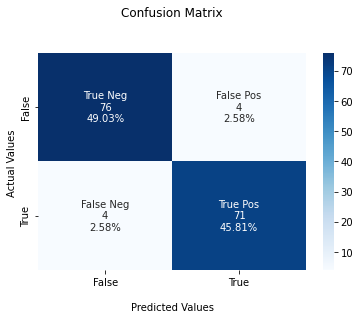

The True Positive Rate is:  [0.95       0.94666667]
The Average True Positive Rate is:  0.9483333333333333

The Positive Precision Value is:  0.9483333333333333


In [76]:
# Accuracy on Train
print('\033[1mThe Training Accuracy is:\033[0m ', NeuralNet_model.score(X_train, y_train))

# Accuracy on Test
print('\033[1mThe Testing Accuracy is:\033[0m ', NeuralNet_model.score(x_test, y_test))

# Classification Report
print('\n',classification_report(y_test, y_pred_NeuralNet_model))

# Confusion Matrix function

cm_NeuralNet_model = confusion_matrix(y_test, y_pred_NeuralNet_model)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_NeuralNet_model.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_NeuralNet_model.flatten()/np.sum(cm_NeuralNet_model)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_NeuralNet_model, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP_NeuralNet_model = cm_NeuralNet_model.sum(axis=0) - np.diag(cm_NeuralNet_model)

FN_NeuralNet_model = cm_NeuralNet_model.sum(axis=1) - np.diag(cm_NeuralNet_model)

TP_NeuralNet_model = np.diag(cm_NeuralNet_model)

TN_NeuralNet_model = cm_NeuralNet_model.sum() - (FP_NeuralNet_model - FN_NeuralNet_model - TP_NeuralNet_model)

# Sensitivity, hit rate, recall, or positive rate

TPR_NeuralNet_model = TP_NeuralNet_model / (TP_NeuralNet_model + FN_NeuralNet_model)
print('\033[1mThe True Positive Rate is:\033[0m ', TPR_NeuralNet_model)
print('\033[1mThe Average True Positive Rate is:\033[0m ', TPR_NeuralNet_model.sum()/2)

# Precision or positive predictive value

PPV_NeuralNet_model = TP_NeuralNet_model / (TP_NeuralNet_model + FP_NeuralNet_model)
print('\n\033[1mThe Positive Precision Value is:\033[0m ', TPR_NeuralNet_model.sum()/2)

>### F. Gradient Boosting

***

In [77]:
# Creating GBC Model
GradientBoosting_model = GradientBoostingClassifier(loss = 'deviance',
                                      criterion = 'squared_error',
                                      warm_start = True,
                                      init = 'zero',
                                      n_estimators = 1000,
                                      max_features = 5,
                                      learning_rate = 1,
                                      max_depth = 29, 
                                      min_samples_split = .325,
                                      min_samples_leaf = .1,
                                      random_state = 361
                                    ) 
GradientBoosting_model.fit(X_train, y_train)

GradientBoostingClassifier(criterion='squared_error', init='zero',
                           learning_rate=1, max_depth=29, max_features=5,
                           min_samples_leaf=0.1, min_samples_split=0.325,
                           n_estimators=1000, random_state=0, warm_start=True)

In [78]:
# predict - Predict class labels for samples in x
    # Have the shape correct, because this prediction have 557 results which is the same number of results in x_train

y_pred_GradientBoosting_model = GradientBoosting_model.predict(x_test)
y_pred_GradientBoosting_model

# predict_proba - Probability estimates 

y_pred_proba_GradientBoosting_model = GradientBoosting_model.predict_proba(x_test)


The Training Accuracy is:  1.0
The Testing Accuracy is:  0.9032258064516129

               precision    recall  f1-score   support

           0       0.88      0.94      0.91        80
           1       0.93      0.87      0.90        75

    accuracy                           0.90       155
   macro avg       0.91      0.90      0.90       155
weighted avg       0.90      0.90      0.90       155



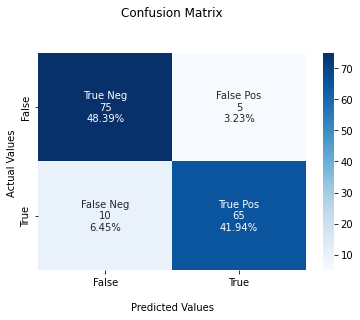

The True Positive Rate is:  [0.9375     0.86666667]
The Average True Positive Rate is:  0.9020833333333333

The Positive Precision Value is:  0.9020833333333333


In [79]:
# Accuracy on Train
print('\033[1mThe Training Accuracy is:\033[0m ', GradientBoosting_model.score(X_train, y_train))

# Accuracy on Test
print('\033[1mThe Testing Accuracy is:\033[0m ', GradientBoosting_model.score(x_test, y_test))

# Classification Report
print('\n',classification_report(y_test, y_pred_GradientBoosting_model))

# Confusion Matrix function

cm_GradientBoosting_model = confusion_matrix(y_test, y_pred_GradientBoosting_model)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_GradientBoosting_model.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_GradientBoosting_model.flatten()/np.sum(cm_GradientBoosting_model)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_GradientBoosting_model, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP_GradientBoosting_model = cm_GradientBoosting_model.sum(axis=0) - np.diag(cm_GradientBoosting_model)

FN_GradientBoosting_model = cm_GradientBoosting_model.sum(axis=1) - np.diag(cm_GradientBoosting_model)

TP_GradientBoosting_model = np.diag(cm_GradientBoosting_model)

TN_GradientBoosting_model = cm_NeuralNet_model.sum() - (FP_GradientBoosting_model - FN_GradientBoosting_model - TP_GradientBoosting_model)

# Sensitivity, hit rate, recall, or positive rate

TPR_GradientBoosting_model = TP_GradientBoosting_model / (TP_GradientBoosting_model + FN_GradientBoosting_model)
print('\033[1mThe True Positive Rate is:\033[0m ', TPR_GradientBoosting_model)
print('\033[1mThe Average True Positive Rate is:\033[0m ', TPR_GradientBoosting_model.sum()/2)

# Precision or positive predictive value

PPV_GradientBoosting_model = TP_GradientBoosting_model / (TP_GradientBoosting_model + FP_GradientBoosting_model)
print('\n\033[1mThe Positive Precision Value is:\033[0m ', TPR_GradientBoosting_model.sum()/2)

***
# 6. Conclusion and Results
<ul>
    <li>Results and Models performance over Training Data</li>
    <li>Results and Models performance over Testing Data</li>
</ul>

***

>### A.Training Data
***

>>#### A. Logistic Regression Model

# WORK IN PROGRESS | DON'T TAKE THE BELOW VALUES AS ACCURATE

***




------------------------  TRAINING ENVIRONMENT ------------------------

------------------------  Logistic Regression Model ------------------------


The Training Accuracy is:  0.8403225806451613
The Testing Accuracy is:  0.8838709677419355

               precision    recall  f1-score   support

           0       0.86      0.91      0.88        80
           1       0.90      0.84      0.87        75

    accuracy                           0.88       155
   macro avg       0.88      0.88      0.88       155
weighted avg       0.88      0.88      0.88       155



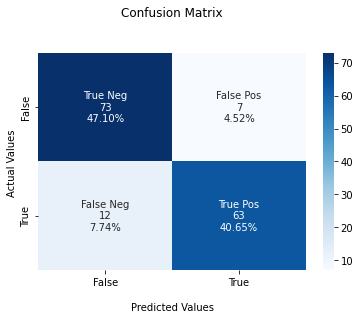

The True Positive Rate is:  [0.9125 0.84  ]
The Average True Positive Rate is:  0.87625

This reflect that out of the total Diseased have 0,8202 of them correct, and out of the tota Non Diseased have 0,9103 of them correct.

The Positive Precision Value is:  0.87625



------------------------  Decision Tree Model ------------------------


The Training Accuracy is:  0.4870967741935484
The Testing Accuracy is:  0.4645161290322581

               precision    recall  f1-score   support

           0       0.92      0.91      0.92        80
           1       0.91      0.92      0.91        75

    accuracy                           0.92       155
   macro avg       0.92      0.92      0.92       155
weighted avg       0.92      0.92      0.92       155



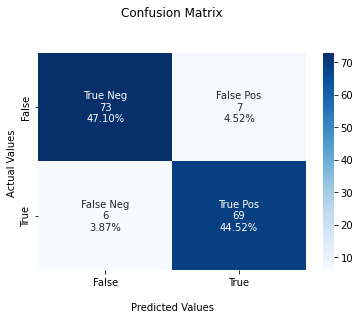

The True Positive Rate is:  [0.9125 0.92  ]
The Average True Positive Rate is:  0.91625

The Positive Precision Value is:  0.91625



------------------------  Random Forest Model ------------------------


The Training Accuracy is:  0.6564516129032258
The Testing Accuracy is:  0.6451612903225806

               precision    recall  f1-score   support

           0       0.98      1.00      0.99        80
           1       1.00      0.97      0.99        75

    accuracy                           0.99       155
   macro avg       0.99      0.99      0.99       155
weighted avg       0.99      0.99      0.99       155



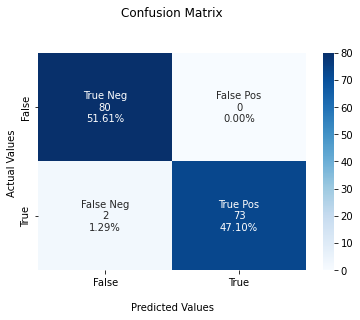

The True Positive Rate is:  [1.         0.97333333]
The Average True Positive Rate is:  0.9866666666666667

The Positive Precision Value is:  0.9866666666666667



------------------------  K Nearest Neighbors Model (KNN) Model ------------------------


The Training Accuracy is:  1.0
The Testing Accuracy is:  0.9806451612903225

               precision    recall  f1-score   support

           0       0.98      0.99      0.98        80
           1       0.99      0.97      0.98        75

    accuracy                           0.98       155
   macro avg       0.98      0.98      0.98       155
weighted avg       0.98      0.98      0.98       155



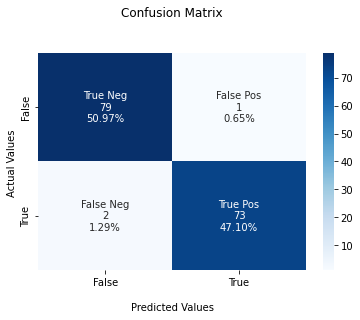

The True Positive Rate is:  [0.9875     0.97333333]
The Average True Positive Rate is:  0.9804166666666667

The Positive Precision Value is:  0.9804166666666667



------------------------  Neural Network Model (NN) Model ------------------------


The Training Accuracy is:  1.0
The Testing Accuracy is:  0.9483870967741935

               precision    recall  f1-score   support

           0       0.95      0.95      0.95        80
           1       0.95      0.95      0.95        75

    accuracy                           0.95       155
   macro avg       0.95      0.95      0.95       155
weighted avg       0.95      0.95      0.95       155



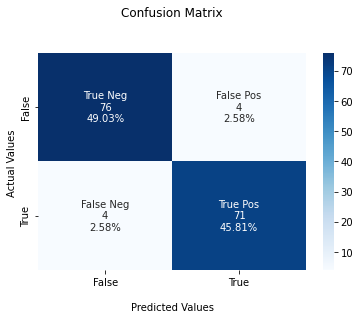

The True Positive Rate is:  [0.95       0.94666667]
The Average True Positive Rate is:  0.9483333333333333

The Positive Precision Value is:  0.9483333333333333



------------------------  Gradient Boosting Model  ------------------------


The Training Accuracy is:  1.0
The Testing Accuracy is:  0.9032258064516129

               precision    recall  f1-score   support

           0       0.88      0.94      0.91        80
           1       0.93      0.87      0.90        75

    accuracy                           0.90       155
   macro avg       0.91      0.90      0.90       155
weighted avg       0.90      0.90      0.90       155



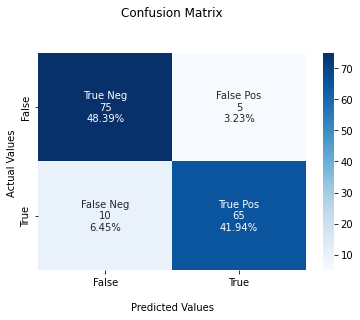

The True Positive Rate is:  [0.9375     0.86666667]
The Average True Positive Rate is:  0.9020833333333333

The Positive Precision Value is:  0.9020833333333333


In [80]:
## LOGISTIC REGRESSION MODEL

print('\n\n\n------------------------','\033[1m TRAINING ENVIRONMENT\033[0m','------------------------\n')

print('------------------------','\033[1m Logistic Regression Model\033[0m','------------------------\n\n')
# Accuracy on Train
print('\033[1mThe Training Accuracy is:\033[0m ', logistic_regression_model.score(X_train, y_train))

# Accuracy on Test
print('\033[1mThe Testing Accuracy is:\033[0m ', logistic_regression_model.score(x_test, y_test))

# Classification Report
print('\n',classification_report(y_test, y_pred_logistic_regression))

# Confusion Matrix function

cm_logistic_regression = confusion_matrix(y_test, y_pred_logistic_regression)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_logistic_regression.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_logistic_regression.flatten()/np.sum(cm_logistic_regression)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_logistic_regression, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP_logistic_regression = cm_logistic_regression.sum(axis=0) - np.diag(cm_logistic_regression)

FN_logistic_regression = cm_logistic_regression.sum(axis=1) - np.diag(cm_logistic_regression)

TP_logistic_regression = np.diag(cm_logistic_regression)

TN_logistic_regression = cm_logistic_regression.sum() - (FP_logistic_regression - FN_logistic_regression - TP_logistic_regression)

# Sensitivity, hit rate, recall, or positive rate

TPR_logistic_regression = TP_logistic_regression / (TP_logistic_regression + FN_logistic_regression)
print('\033[1mThe True Positive Rate is:\033[0m ', TPR_logistic_regression)
print('\033[1mThe Average True Positive Rate is:\033[0m ', TPR_logistic_regression.sum()/2)
print('\nThis reflect that out of the total Diseased have 0,8202 of them correct, and out of the tota Non Diseased have 0,9103 of them correct.')

# Precision or positive predictive value

PPV_logistic_regression = TP_logistic_regression / (TP_logistic_regression + FP_logistic_regression)
print('\n\033[1mThe Positive Precision Value is:\033[0m ', TPR_logistic_regression.sum()/2)


## DECISION TREE MODEL

print('\n\n\n------------------------','\033[1m Decision Tree Model\033[0m','------------------------\n\n')
# Accuracy on Train
print('\033[1mThe Training Accuracy is:\033[0m ', decision_tree_model.score(X_train, y_train))

# Accuracy on Test
print('\033[1mThe Testing Accuracy is:\033[0m ', decision_tree_model.score(x_test, y_test))

# Classification Report
print('\n',classification_report(y_test, y_pred_decision_tree))

# Confusion Matrix function

cm_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_decision_tree.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_decision_tree.flatten()/np.sum(cm_decision_tree)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_decision_tree, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP_decision_tree = cm_decision_tree.sum(axis=0) - np.diag(cm_decision_tree)

FN_decision_tree = cm_decision_tree.sum(axis=1) - np.diag(cm_decision_tree)

TP_decision_tree = np.diag(cm_decision_tree)

TN_decision_tree = cm_decision_tree.sum() - (FP_decision_tree - FN_decision_tree - TP_decision_tree)

# Sensitivity, hit rate, recall, or positive rate

TPR_decision_tree = TP_decision_tree / (TP_decision_tree + FN_decision_tree)
print('\033[1mThe True Positive Rate is:\033[0m ', TPR_decision_tree)
print('\033[1mThe Average True Positive Rate is:\033[0m ', TPR_decision_tree.sum()/2)

# Precision or positive predictive value

PPV_decision_tree = TP_decision_tree / (TP_decision_tree + FP_decision_tree)
print('\n\033[1mThe Positive Precision Value is:\033[0m ', TPR_decision_tree.sum()/2)


## RANDOM FOREST MODEL

print('\n\n\n------------------------','\033[1m Random Forest Model\033[0m','------------------------\n\n')
# Accuracy on Train
print('\033[1mThe Training Accuracy is:\033[0m ', random_forest_model.score(X_train, y_train))

# Accuracy on Test
print('\033[1mThe Testing Accuracy is:\033[0m ', random_forest_model.score(x_test, y_test))

# Classification Report
print('\n',classification_report(y_test, y_pred_random_forest))

# Confusion Matrix function

cm_random_forest = confusion_matrix(y_test, y_pred_random_forest)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_random_forest.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_random_forest.flatten()/np.sum(cm_random_forest)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_random_forest, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP_random_forest = cm_random_forest.sum(axis=0) - np.diag(cm_random_forest)

FN_random_forest = cm_random_forest.sum(axis=1) - np.diag(cm_random_forest)

TP_random_forest = np.diag(cm_random_forest)

TN_random_forest = cm_random_forest.sum() - (FP_random_forest - FN_random_forest - TP_random_forest)

# Sensitivity, hit rate, recall, or positive rate

TPR_random_forest = TP_random_forest / (TP_random_forest + FN_random_forest)
print('\033[1mThe True Positive Rate is:\033[0m ', TPR_random_forest)
print('\033[1mThe Average True Positive Rate is:\033[0m ', TPR_random_forest.sum()/2)

# Precision or positive predictive value

PPV_random_forest = TP_random_forest / (TP_random_forest + FP_random_forest)
print('\n\033[1mThe Positive Precision Value is:\033[0m ', TPR_random_forest.sum()/2)

##  K Nearest Neighbors Model (KNN)

print('\n\n\n------------------------','\033[1m K Nearest Neighbors Model (KNN) Model\033[0m','------------------------\n\n')

# Accuracy on Train
print('\033[1mThe Training Accuracy is:\033[0m ', KNN_model.score(X_train, y_train))

# Accuracy on Test
print('\033[1mThe Testing Accuracy is:\033[0m ', KNN_model.score(x_test, y_test))

# Classification Report
print('\n',classification_report(y_test, y_pred_KNN_model))

# Confusion Matrix function

cm_KNN_model = confusion_matrix(y_test, y_pred_KNN_model)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_KNN_model.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_KNN_model.flatten()/np.sum(cm_KNN_model)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_KNN_model, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP_KNN_model = cm_KNN_model.sum(axis=0) - np.diag(cm_KNN_model)

FN_KNN_model = cm_KNN_model.sum(axis=1) - np.diag(cm_KNN_model)

TP_KNN_model = np.diag(cm_KNN_model)

TN_KNN_model = cm_KNN_model.sum() - (FP_KNN_model - FN_KNN_model - TP_KNN_model)

# Sensitivity, hit rate, recall, or positive rate

TPR_KNN_model = TP_KNN_model / (TP_KNN_model + FN_KNN_model)
print('\033[1mThe True Positive Rate is:\033[0m ', TPR_KNN_model)
print('\033[1mThe Average True Positive Rate is:\033[0m ', TPR_KNN_model.sum()/2)

# Precision or positive predictive value

PPV_KNN_model = TP_KNN_model / (TP_KNN_model + FP_KNN_model)
print('\n\033[1mThe Positive Precision Value is:\033[0m ', TPR_KNN_model.sum()/2)


##  Neural Network Model (NN)

print('\n\n\n------------------------','\033[1m Neural Network Model (NN) Model\033[0m','------------------------\n\n')

# Accuracy on Train
print('\033[1mThe Training Accuracy is:\033[0m ', NeuralNet_model.score(X_train, y_train))

# Accuracy on Test
print('\033[1mThe Testing Accuracy is:\033[0m ', NeuralNet_model.score(x_test, y_test))

# Classification Report
print('\n',classification_report(y_test, y_pred_NeuralNet_model))

# Confusion Matrix function

cm_NeuralNet_model = confusion_matrix(y_test, y_pred_NeuralNet_model)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_NeuralNet_model.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_NeuralNet_model.flatten()/np.sum(cm_NeuralNet_model)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_NeuralNet_model, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP_NeuralNet_model = cm_NeuralNet_model.sum(axis=0) - np.diag(cm_NeuralNet_model)

FN_NeuralNet_model = cm_NeuralNet_model.sum(axis=1) - np.diag(cm_NeuralNet_model)

TP_NeuralNet_model = np.diag(cm_NeuralNet_model)

TN_NeuralNet_model = cm_NeuralNet_model.sum() - (FP_NeuralNet_model - FN_NeuralNet_model - TP_NeuralNet_model)

# Sensitivity, hit rate, recall, or positive rate

TPR_NeuralNet_model = TP_NeuralNet_model / (TP_NeuralNet_model + FN_NeuralNet_model)
print('\033[1mThe True Positive Rate is:\033[0m ', TPR_NeuralNet_model)
print('\033[1mThe Average True Positive Rate is:\033[0m ', TPR_NeuralNet_model.sum()/2)

# Precision or positive predictive value

PPV_NeuralNet_model = TP_NeuralNet_model / (TP_NeuralNet_model + FP_NeuralNet_model)
print('\n\033[1mThe Positive Precision Value is:\033[0m ', TPR_NeuralNet_model.sum()/2)


##  Gradient Boosting

print('\n\n\n------------------------','\033[1m Gradient Boosting Model \033[0m','------------------------\n\n')

# Accuracy on Train
print('\033[1mThe Training Accuracy is:\033[0m ', GradientBoosting_model.score(X_train, y_train))

# Accuracy on Test
print('\033[1mThe Testing Accuracy is:\033[0m ', GradientBoosting_model.score(x_test, y_test))

# Classification Report
print('\n',classification_report(y_test, y_pred_GradientBoosting_model))

# Confusion Matrix function

cm_GradientBoosting_model = confusion_matrix(y_test, y_pred_GradientBoosting_model)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_GradientBoosting_model.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_GradientBoosting_model.flatten()/np.sum(cm_GradientBoosting_model)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_GradientBoosting_model, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP_GradientBoosting_model = cm_GradientBoosting_model.sum(axis=0) - np.diag(cm_GradientBoosting_model)

FN_GradientBoosting_model = cm_GradientBoosting_model.sum(axis=1) - np.diag(cm_GradientBoosting_model)

TP_GradientBoosting_model = np.diag(cm_GradientBoosting_model)

TN_GradientBoosting_model = cm_NeuralNet_model.sum() - (FP_GradientBoosting_model - FN_GradientBoosting_model - TP_GradientBoosting_model)

# Sensitivity, hit rate, recall, or positive rate

TPR_GradientBoosting_model = TP_GradientBoosting_model / (TP_GradientBoosting_model + FN_GradientBoosting_model)
print('\033[1mThe True Positive Rate is:\033[0m ', TPR_GradientBoosting_model)
print('\033[1mThe Average True Positive Rate is:\033[0m ', TPR_GradientBoosting_model.sum()/2)

# Precision or positive predictive value

PPV_GradientBoosting_model = TP_GradientBoosting_model / (TP_GradientBoosting_model + FP_GradientBoosting_model)
print('\n\033[1mThe Positive Precision Value is:\033[0m ', TPR_GradientBoosting_model.sum()/2)
